<a href="https://colab.research.google.com/github/dkd99/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS./blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
#importing all the important librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [177]:
df_name=pd.read_csv('/content/drive/MyDrive/csv files/Zomato Restaurant names and Metadata.csv')

In [178]:
df_rev=pd.read_csv('/content/drive/MyDrive/csv files/Zomato Restaurant reviews.csv')

In [179]:
df_name.shape

(105, 6)

### Dataset First View

In [180]:
df_name.head(5)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [181]:
df_rev.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [182]:
df_rev.shape

(10000, 7)

In [183]:
df_name.shape

(105, 6)

### Dataset Information

In [184]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [185]:
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


#### Duplicate Values

In [186]:
# duplicate
len(df_rev[df_rev.duplicated()])

36

In [187]:
len(df_name[df_name.duplicated()])

0

In [188]:
df_rev[df_rev.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [189]:
len(df_rev[df_rev['Restaurant']=='American Wild Wings'])

100

#### Missing Values/Null Values

In [190]:
df_rev[df_rev['Restaurant']=='American Wild Wings'].isnull().sum()

Restaurant     0
Reviewer      23
Review        23
Rating        23
Metadata      23
Time          23
Pictures       0
dtype: int64

In [191]:
len(df_rev[df_rev['Restaurant']=='Arena Eleven'])

100

In [192]:
df_rev[df_rev['Restaurant']=='Arena Eleven'].isnull().sum()

Restaurant     0
Reviewer      15
Review        15
Rating        15
Metadata      15
Time          15
Pictures       0
dtype: int64

In [193]:
df_rev.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

We can see from the duplicate values and null values that most of the missing reviews are shown as duplicates . 

In [194]:
(df_rev.isnull().sum()/len(df_rev))*100

Restaurant    0.00
Reviewer      0.38
Review        0.45
Rating        0.38
Metadata      0.38
Time          0.38
Pictures      0.00
dtype: float64

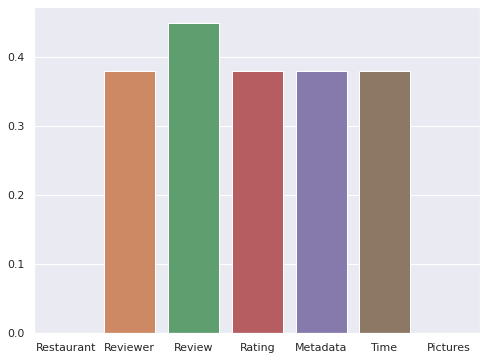

In [195]:
sns.set(rc={"figure.figsize":(8, 6)}) 
sns.barplot(y=(df_rev.isnull().sum()/len(df_rev))*100,x=df_rev.isnull().sum().index)

In [196]:
df_name.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [197]:
df_name['Collections']

0      Food Hygiene Rated Restaurants in Hyderabad, C...
1                                    Hyderabad's Hottest
2                     Great Buffets, Hyderabad's Hottest
3                                 Late Night Restaurants
4      Best Bars & Pubs, Food Hygiene Rated Restauran...
                             ...                        
100                                                  NaN
101                                                  NaN
102                                                  NaN
103                                                  NaN
104                                 Pan-Asian Delicacies
Name: Collections, Length: 105, dtype: object

### What did you know about your dataset?


We have two datasets in this project One about Restaurants associated with zomato and the other about users who use zomato.In the restaurant data,We have names of restaurant ,their website ,cuisines they offer,Cost of food etc.

In the user dataset,We have recorded interaction between users and restaurants through zomato.Reviews given by user as well ratings are recorded .

## ***2. Understanding Your Variables***

In [205]:
df_rev.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [206]:
df_rev['Restaurant'].nunique()

100

In [207]:
df_rev['Restaurant'].unique()

array(['Beyond Flavours', 'Paradise', 'Flechazo',
       'Shah Ghouse Hotel & Restaurant', 'Over The Moon Brew Company',
       "The Fisherman's Wharf", 'eat.fit', 'Shah Ghouse Spl Shawarma',
       'Hyper Local', 'Cream Stone', "Sardarji's Chaats & More",
       'Barbeque Nation', 'Absolute Sizzlers',
       'The Lal Street - Bar Exchange', "AB's - Absolute Barbecues",
       'KFC', 'NorFest - The Dhaba', 'Hotel Zara Hi-Fi',
       '10 Downing Street', 'Pakwaan Grand', '13 Dhaba',
       "Jonathan's Kitchen - Holiday Inn Express & Suites", 'B-Dubs',
       'Amul', 'SKYHY', 'Tiki Shack', 'Mustang Terrace Lounge',
       "3B's - Buddies, Bar & Barbecue", 'Behrouz Biryani',
       'Hunger Maggi Point', 'Pot Pourri', 'Pista House',
       'Marsala Food Company', 'Club Rogue',
       'Mazzo - Marriott Executive Apartments',
       'Green Bawarchi Restaurant', 'Banana Leaf Multicuisine Restaurant',
       'Kritunga Restaurant', 'The Glass Onion', 'Deli 9 Bistro',
       'Frio Bistro', 'Kara

In [208]:
df_rev['Restaurant'].describe()

count               10000
unique                100
top       Beyond Flavours
freq                  100
Name: Restaurant, dtype: object

There are 100 different restaurants from which orders have been made by users.Each restaurant has 100 ratings.

In [209]:
df_rev['Reviewer'].nunique()

7446

There are 7446 different users who have ordered from restaurants.

In [210]:
df_name.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [211]:
df_name['Name'].nunique()

105

There are 105 different restaurants associated with zomato.Out of which from 100 restaurants orders have been done(We can see this from review data.)

In [212]:
df_name['Cuisines']

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [213]:
list(df_name['Cuisines'].unique())

['Chinese, Continental, Kebab, European, South Indian, North Indian',
 'Biryani, North Indian, Chinese',
 'Asian, Mediterranean, North Indian, Desserts',
 'Biryani, North Indian, Chinese, Seafood, Beverages',
 'Asian, Continental, North Indian, Chinese, Mediterranean',
 'Seafood, Goan, North Indian, Continental, Asian',
 'Healthy Food, North Indian, Continental, South Indian',
 'Lebanese',
 'American, Chinese, North Indian, Kebab, South Indian',
 'Ice Cream, Desserts',
 'Street Food, North Indian, Fast Food',
 'Mediterranean, North Indian, Kebab, BBQ',
 'Continental, American, Chinese',
 'North Indian, Italian, Finger Food',
 'European, Mediterranean, North Indian',
 'Burger, Fast Food',
 'North Indian',
 'Chinese, North Indian',
 'North Indian, Chinese, Continental',
 'North Indian, Chinese, Biryani',
 'North Indian, Japanese, Italian, Salad, Sushi',
 'American',
 'Continental',
 'Mexican, Italian, North Indian, Chinese, Salad',
 'North Indian, Mediterranean, European',
 'Mughlai, Bir

## 3. ***Data Wrangling ***

In [214]:
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


Lets convert Cost column to integer type from object type .

In [215]:
df_name['Cost']=df_name['Cost'].str.replace(',','').astype(int)

In [216]:
df_name['Cost'].describe()

count     105.000000
mean      861.428571
std       510.149730
min       150.000000
25%       500.000000
50%       700.000000
75%      1200.000000
max      2800.000000
Name: Cost, dtype: float64

In [217]:
df_name['Cost'].value_counts().sort_values(ascending=False)

500     13
600     10
700      8
1200     7
400      6
1000     6
200      5
800      5
1500     5
1300     4
550      3
1100     3
900      3
750      3
1600     3
350      3
1700     2
150      2
1400     2
450      2
1900     2
300      1
2500     1
850      1
650      1
1800     1
2800     1
1750     1
250      1
Name: Cost, dtype: int64

**We can see from above that restaurants which have price between 400 -1500 are most in numbers.**

**A part of data wrangling will be done in the next section.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [218]:
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


In [219]:
df_name.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

**Lets see which restaurants are most costly.**

In [220]:
df_name[['Name','Cost']].sort_values('Cost',ascending=False).reset_index(drop=True).head(10)

,Name,Cost
0,Collage - Hyatt Hyderabad Gachibowli,2800
1,Feast - Sheraton Hyderabad Hotel,2500
2,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
3,10 Downing Street,1900
4,Cascade - Radisson Hyderabad Hitec City,1800
5,Zega - Sheraton Hyderabad Hotel,1750
6,Republic Of Noodles - Lemon Tree Hotel,1700
7,Mazzo - Marriott Executive Apartments,1700
8,Arena Eleven,1600
9,Barbeque Nation,1600


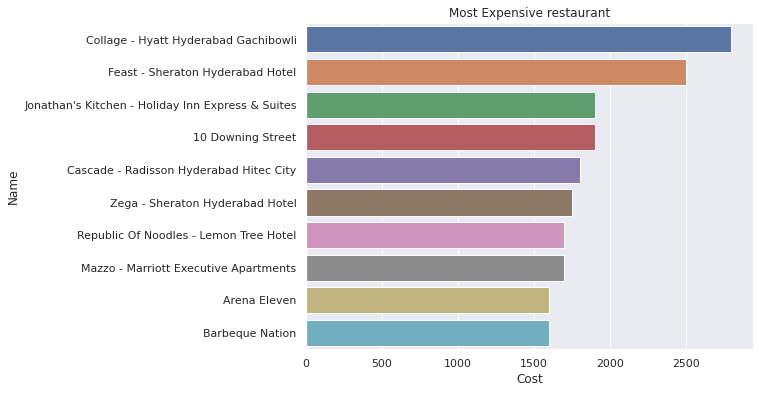

In [221]:
sns.barplot(x='Cost',
            y="Name", 
            data=df_name, 
            order=df_name.sort_values('Cost',ascending=False).Name[:10])

plt.title('Most Expensive restaurant')
plt.show()

Collage -Hyatt Hyderabad is the most expensive restaurant.

**Lets look at Restaurants having cheapest price.**

In [222]:
df_name[['Name','Cost']].sort_values('Cost',ascending=False).reset_index(drop=True).tail(10)

,Name,Cost
95,Cream Stone,350
96,Shah Ghouse Spl Shawarma,300
97,Wich Please,250
98,Asian Meal Box,200
99,KS Bakers,200
100,Momos Delight,200
101,Hunger Maggi Point,200
102,Sweet Basket,200
103,Mohammedia Shawarma,150
104,Amul,150


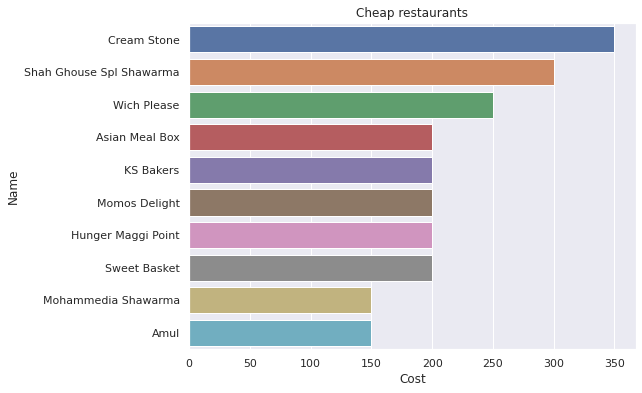

In [223]:
sns.barplot(x='Cost',
            y="Name", 
            data=df_name, 
            order=df_name.sort_values('Cost',ascending=False).Name[-10:])

plt.title('Cheap restaurants')
plt.show()



*   Amul is the cheapest restaurant along with Mohammedia Shawarma and Sweet Basket.

**We can see from above that restaurants which have price between 400 -1500 are most in numbers.**

[Text(0.5, 1.0, 'Distribution of cost wrt different restaurents')]

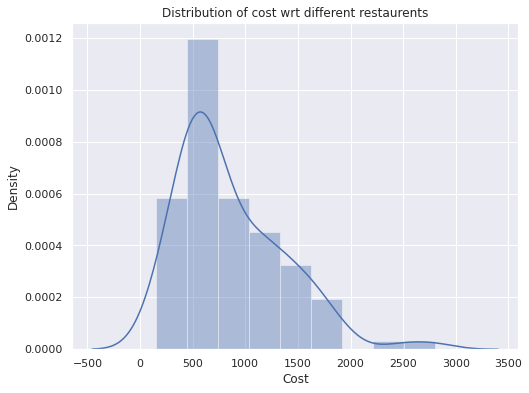

In [224]:
sns.distplot(df_name['Cost']).set(title='Distribution of cost wrt different restaurents')

In [225]:
df_name['Cuisines']

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

**Let's see what are most famous cuisines served at restaurants.**

In [226]:
#creating a dataframe of number of cuisines served at each restaurant
cuisine_list = df_name['Cuisines'].str.split(', ') 
cuis_dict = {} 
for cuisines in cuisine_list: 
    for name in cuisines:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:  
            cuis_dict[name]=1 
cuis_df = pd.DataFrame(cuis_dict.values(),index = cuis_dict.keys(),columns = {'number of Restaurants which serve cuisine'}) 
cuis_df.sort_values(by = 'number of Restaurants which serve cuisine',ascending = False,inplace = True) 
cuis_df.reset_index(inplace=True)
top_5_cuisines = cuis_df[0:5]
print('The Top 5 Cuisines are:\n',top_5_cuisines)

The Top 5 Cuisines are:
           index  number of Restaurants which serve cuisine
0  North Indian                                         61
1       Chinese                                         43
2   Continental                                         21
3       Biryani                                         16
4     Fast Food                                         15


Text(0.5, 1.0, 'Most popular cuisines at Restaurants ')

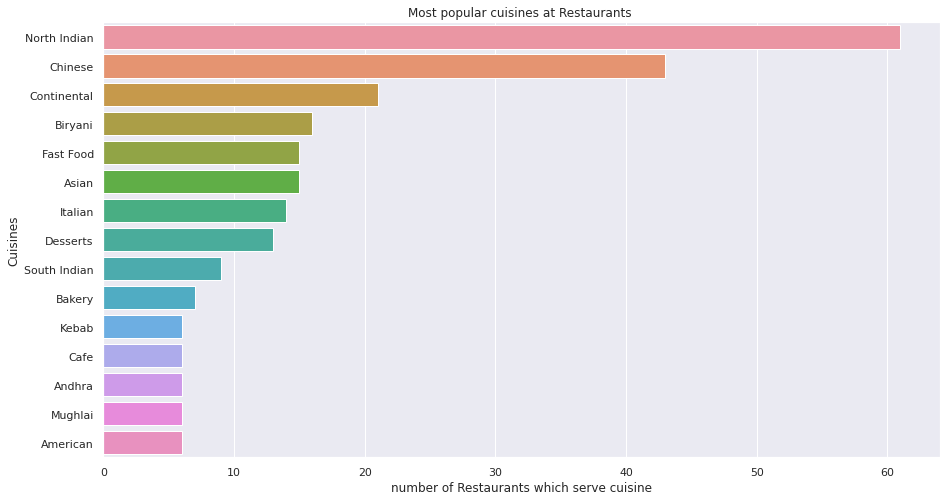

In [228]:
fig = plt.figure(figsize=[15,8])
sns.barplot(data=cuis_df[:15], y='index', x= 'number of Restaurants which serve cuisine')
plt.ylabel('Cuisines')

plt.xlabel('number of Restaurants which serve cuisine')
plt.title('Most popular cuisines at Restaurants ')



*   North Indian cuisine is the most famous cuisine among restaurants alongwith 
chinese, continental and biryani.

**Lets analyse number of tags given to restaurants by zomato.**

In [229]:
df_name['Collections']

0      Food Hygiene Rated Restaurants in Hyderabad, C...
1                                    Hyderabad's Hottest
2                     Great Buffets, Hyderabad's Hottest
3                                 Late Night Restaurants
4      Best Bars & Pubs, Food Hygiene Rated Restauran...
                             ...                        
100                                                  NaN
101                                                  NaN
102                                                  NaN
103                                                  NaN
104                                 Pan-Asian Delicacies
Name: Collections, Length: 105, dtype: object

In [230]:
df_name['Collections'].isna().sum()

54

**Creating a dataframe of the restaurants which have tags by dropping those who don't have from df_name dataframe.**

In [231]:
df=df_name.dropna()

In [232]:
len(df)

51

In [233]:
len(df_name)

105

**Creating a new column which contains list of tags by splitting the strings present in Collections column.**

In [234]:
df['Collections_list']=df['Collections'].str.split(', ')

In [235]:
df.head()

,Name,Links,Cost,Collections,Cuisines,Timings,Collections_list
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","[Food Hygiene Rated Restaurants in Hyderabad, ..."
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,[Hyderabad's Hottest]
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM","[Great Buffets, Hyderabad's Hottest]"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,[Late Night Restaurants]
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...","[Best Bars & Pubs, Food Hygiene Rated Restaura..."


In [236]:
df['number of tags']=df['Collections_list'].apply(lambda x : len(x))


In [237]:
df.head(5)

,Name,Links,Cost,Collections,Cuisines,Timings,Collections_list,number of tags
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","[Food Hygiene Rated Restaurants in Hyderabad, ...",6
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,[Hyderabad's Hottest],1
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM","[Great Buffets, Hyderabad's Hottest]",2
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,[Late Night Restaurants],1
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...","[Best Bars & Pubs, Food Hygiene Rated Restaura...",5


**Lets see if the Restaurants which have high cost also have high number of tags??**

We can see correlation between high cost and number of tags.

In [238]:
df[['Cost','number of tags']].corr()

,Cost,number of tags
Cost,1.000000,0.207433
number of tags,0.207433,1.000000


There is low correlation between cost and number of tags.

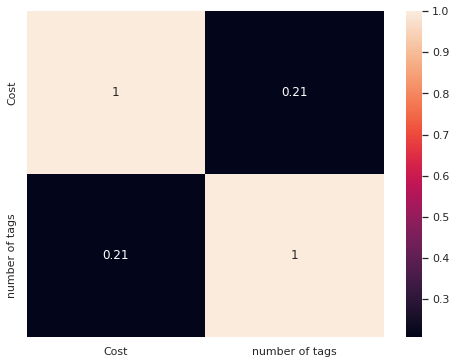

In [239]:
sns.heatmap(df[['Cost','number of tags']].corr(),annot=True)

In [240]:
Collections_list=df['Collections'].str.split(', ')
Collections_list.explode()

0      Food Hygiene Rated Restaurants in Hyderabad
0                              Corporate Favorites
0                                    Great Buffets
0                                        Top-Rated
0                                     Gold Curated
                          ...                     
87     Food Hygiene Rated Restaurants in Hyderabad
90                                     New on Gold
92                                 Sunday Brunches
96     Food Hygiene Rated Restaurants in Hyderabad
104                           Pan-Asian Delicacies
Name: Collections, Length: 106, dtype: object

**Lets see what restaurants have highest number of tags given by Zomato.**

Text(0.5, 1.0, 'restaurants with highest number of tags')

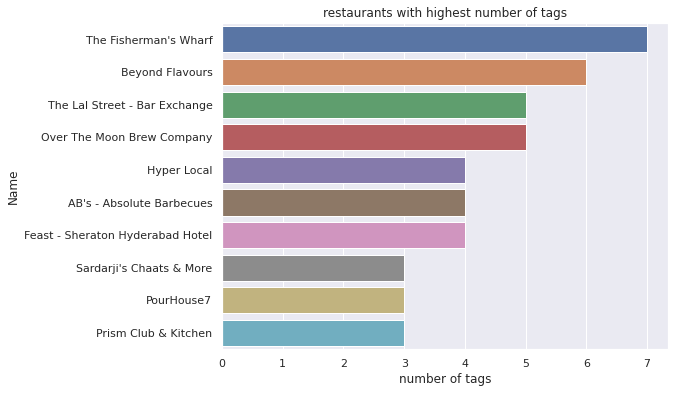

In [241]:
sns.barplot(x='number of tags',
            y='Name',
            data=df,
            order=df.sort_values('number of tags',ascending=False).Name[:10])
plt.title('restaurants with highest number of tags')



*   The Restaurant named 'The Fisherman's Wharf' has been given highest number of tags by zomato.

**Lets see what  kind of tags are there and which tags are most famous.**

In [242]:
#Creating a dataframe of tags and number of tags
Collections_dict = {}
for lst in Collections_list:
    for tag in lst:
        if (tag in Collections_dict.keys()):
            Collections_dict[tag]+=1
        else:  
            Collections_dict[tag]=1

In [243]:
Collections_dict

{'Food Hygiene Rated Restaurants in Hyderabad': 8,
 'Corporate Favorites': 6,
 'Great Buffets': 11,
 'Top-Rated': 5,
 'Gold Curated': 5,
 'Live Sports Screenings': 7,
 "Hyderabad's Hottest": 7,
 'Late Night Restaurants': 2,
 'Best Bars & Pubs': 4,
 'Sunday Brunches': 4,
 'Trending This Week': 5,
 'Frozen Delights': 1,
 'Street Food': 1,
 'Veggie Friendly': 4,
 'Pocket Friendly': 1,
 'Barbecue & Grill': 3,
 'Happy Hours': 3,
 'Rooftops': 2,
 'Great Italian': 1,
 'Gigs and Events': 3,
 'Haleem': 1,
 'Mandi': 1,
 'The ‘Must Visit’ Eateries': 1,
 'Fancy and Fun': 2,
 'Great Breakfasts': 2,
 'Best shawarmas': 1,
 'Function Venues': 2,
 'Regional Favorites': 1,
 'Pan-Asian Delicacies': 2,
 'Terrific Thalis': 1,
 'Sneak Peek Hyderabad': 2,
 'Ramzan Mubarak': 1,
 'Best Milkshakes': 1,
 'Top Drinking Destinations': 1,
 'Best Bakeries': 1,
 'New on Gold': 2,
 'Brilliant Biryanis': 1}

In [244]:
Tags_df=pd.DataFrame(list(Collections_dict.items()),columns=['Tags','Count of tags'])

In [245]:
Tags_df.sort_values('Count of tags',ascending=False).reset_index(drop=True)

,Tags,Count of tags
0,Great Buffets,11
1,Food Hygiene Rated Restaurants in Hyderabad,8
2,Live Sports Screenings,7
3,Hyderabad's Hottest,7
4,Corporate Favorites,6
5,Top-Rated,5
6,Gold Curated,5
7,Trending This Week,5
8,Sunday Brunches,4
9,Veggie Friendly,4


**Lets visualize this using barplot.**

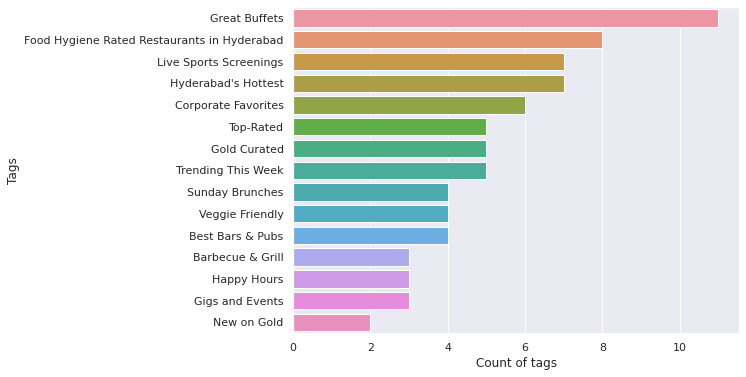

In [246]:
sns.barplot(x='Count of tags',y='Tags',data=Tags_df,order=Tags_df.sort_values('Count of tags',ascending=False).Tags[:15])



* **  Most frequnt tag given by zomato to restaurants is Great Buffets.**



**EDA AND DATA WRANGLING ON REVIEW DATA-**

In [247]:
df_rev.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [248]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [249]:
df_rev.isnull().sum().index

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [250]:
df_rev.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [251]:
df_rev.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

**Let's analyse the ratings given by users to Restaurants.**

**Converting Rating column from object type to float type**

In [252]:
df_rev.loc[df_rev['Rating'] == 'Like'] = np.nan

df_rev['Rating'] = df_rev['Rating'].astype('float64')


**Replacing null ratings with mean ratings-**

In [253]:
df_rev.loc[df_rev['Rating'].isna(),'Rating']=round(df_rev.loc[~df_rev['Rating'].isna(),'Rating'].mean(),2)

In [254]:
df_rev['Rating'].describe()

count    10000.000000
mean         3.601040
std          1.480565
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

**Let's see through a barplot of the most frequent ratings given by users.**

[Text(0, 0.5, 'counts'),
 Text(0.5, 0, 'ratings'),
 Text(0.5, 1.0, 'Rating frequncy')]

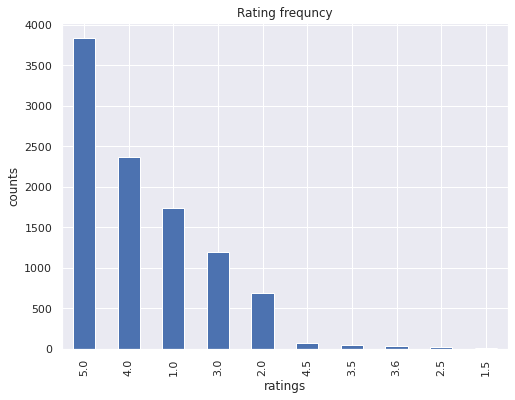

In [255]:
df_rev['Rating'].value_counts().plot(kind='bar').set(title='Rating frequncy',xlabel='ratings',ylabel='counts')



*   Most frequent rating given by users is 5 out of 5 and least rating given is 1.5 out of 5.




**Lets see what average ratings did each restaurants got.**

In [256]:
rating_df=pd.DataFrame(df_rev.groupby(['Restaurant']).aggregate({'Rating':'mean'}).sort_values('Rating',ascending=False))

**Highest rated restaurants-**

In [257]:
rating_df.head()

,Rating
Restaurant,
AB's - Absolute Barbecues,4.88
B-Dubs,4.81
"3B's - Buddies, Bar & Barbecue",4.76
Paradise,4.70
Flechazo,4.66


**Highest rated restaurants using barplot-**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

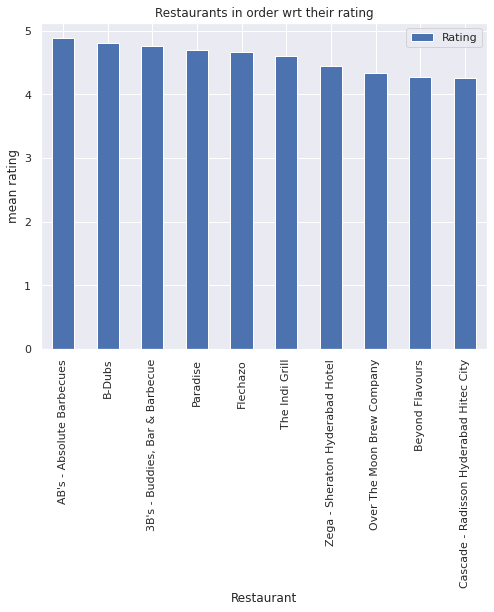

In [258]:
rating_df.head(10).plot(kind='bar',ylabel='mean rating',title='Restaurants in order wrt their rating')
plt.xticks(rotation=90)

**Least rated restaurants using barplot-**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

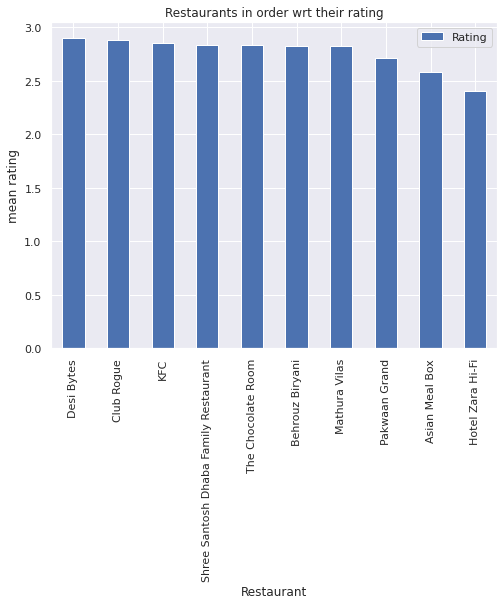

In [259]:
rating_df.tail(10).plot(kind='bar',ylabel='mean rating',title='Restaurants in order wrt their rating')
plt.xticks(rotation=90)



*   AB's absolute barbeque is the highest rated restaurant while Hotel Zara Hi-Fi is the least rated restaurant.

**Lets try to see who writes most reviews and what kind of ratings do they give-**

Lets split the Meta data column which contains information about number of reviews given by user-

In [260]:
df_rev['Number of Reviews'],df_rev['Followers']=df_rev['Metadata'].str.split(',').str


In [261]:
df_rev.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Number of Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,1 Review,2 Followers
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,3 Reviews,2 Followers
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2 Reviews,3 Followers
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,1 Review,1 Follower
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,3 Reviews,2 Followers


**Extracting the number of reviews from string   and then converting it to numeric-**

In [262]:
df_rev['Number of Reviews'] = pd.to_numeric(df_rev['Number of Reviews'].str.split(' ').str[0])
df_rev['Followers'] = pd.to_numeric(df_rev['Followers'].str.split(' ').str[1])

In [263]:
df_rev.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Number of Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,3.0,2.0


**Number of different Reviewers and their frequency of  orders-**

In [264]:
df_rev['Reviewer'].value_counts().head(10)

Ankita                            13
Parijat Ray                       13
Kiran                             12
Jay Mehta                         11
Vedant Killa                      11
Sravani                           10
Siva Kumar                        10
Priyanka                          10
Age Of Foodies (Suraj Karambe)    10
Manojkumar D Nambisan             10
Name: Reviewer, dtype: int64

[Text(0, 0.5, 'Number of orders'),
 Text(0.5, 0, 'Reviewer'),
 Text(0.5, 1.0, 'Most frequent users')]

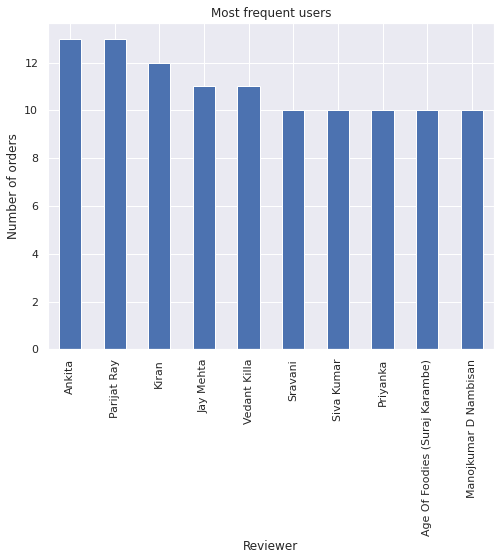

In [265]:
df_rev['Reviewer'].value_counts().head(10).plot(kind='bar').set(title='Most frequent users',xlabel='Reviewer',ylabel='Number of orders')

The most frequent buyer from zomato is Ankita.

**Review given by user Ankita-**

In [266]:
df_rev[df_rev['Reviewer']=='Ankita']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Number of Reviews,Followers
858,Hyper Local,Ankita,We liked the chhole bhature as it was not at a...,4.0,"10 Reviews , 8 Followers",4/7/2019 17:29,0.0,10.0,8.0
1278,Absolute Sizzlers,Ankita,A Friday outing in Absolute Sizzlers. Quite po...,4.0,"76 Reviews , 211 Followers",3/13/2019 13:22,5.0,76.0,211.0
1362,The Lal Street - Bar Exchange,Ankita,A good place to hangout. They have indoor as w...,4.0,"10 Reviews , 8 Followers",4/7/2019 17:31,0.0,10.0,8.0
2194,Jonathan's Kitchen - Holiday Inn Express & Suites,Ankita,A quick dinner for last Sunday of 2018 landed ...,4.0,"76 Reviews , 211 Followers",1/2/2019 17:20,1.0,76.0,211.0
2484,SKYHY,Ankita,"So beautiful, great DJ nights, economic, great...",5.0,"10 Reviews , 179 Followers",10/2/2018 14:10,0.0,10.0,179.0
3641,Banana Leaf Multicuisine Restaurant,Ankita,Buffet system is so cool. Just loved the food....,5.0,"10 Reviews , 179 Followers",10/2/2018 14:03,0.0,10.0,179.0
3706,Kritunga Restaurant,Ankita,We had picked up Sambar rice to satiate the cr...,3.0,"76 Reviews , 211 Followers",4/15/2019 12:28,0.0,76.0,211.0
4315,The Foodie Monster Kitchen,Ankita,"Located near DLF, IIIT - This small place is m...",4.0,"76 Reviews , 211 Followers",2/8/2019 10:55,1.0,76.0,211.0
4612,Ulavacharu,Ankita,Undoubtedly pocket friendly place.\nWe had chi...,4.0,"76 Reviews , 211 Followers",5/4/2019 9:21,3.0,76.0,211.0
4818,Udipi's Upahar,Ankita,"Good food, loved the south Indian dishes over ...",4.0,"10 Reviews , 179 Followers",10/2/2018 13:57,0.0,10.0,179.0


**Lets see which reviewers have given most number of reviews-**

Text(0.5, 1.0, 'Number of reviews given by  customers')

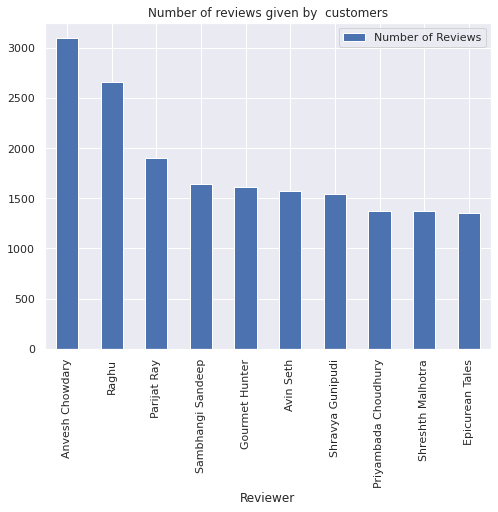

In [267]:
df_rev.groupby(['Reviewer']).aggregate({'Number of Reviews':'sum'}).sort_values('Number of Reviews',ascending=False)[:10].plot(kind='bar')
plt.title('Number of reviews given by  customers')

Anvesh chowdhary has given highest number of reviews.

In [268]:
df_rev = df_rev.drop(['Metadata'], axis =1)

** **

**Lets convert 'Time' column from datetime datatype and then extract month, year and hour for better analysis.**

In [269]:
df_rev['Time']=pd.to_datetime(df_rev['Time'])
df_rev['Year'] = df_rev['Time'].dt.year
df_rev['Month'] = df_rev['Time'].dt.month
df_rev['Hour'] = df_rev['Time'].dt.hour

In [270]:
df_rev

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Number of Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,2016-06-05 00:08:00,0.0,53.0,54.0,2016.0,6.0,0.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2016-06-04 22:01:00,0.0,2.0,53.0,2016.0,6.0,22.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,2016-06-03 10:37:00,3.0,65.0,423.0,2016.0,6.0,10.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,2016-05-31 17:22:00,0.0,13.0,144.0,2016.0,5.0,17.0


**Number  of picture reviews given by different users for specific restaurants- **

In [271]:
df_rev.groupby(['Restaurant','Reviewer']).aggregate({'Pictures':'sum'}).sort_values('Pictures',ascending=False)[:10]

,,Pictures
Restaurant,Reviewer,
Arena Eleven,Anvith Devulapally,64.0
Pista House,Food Nawabs,52.0
Ulavacharu,Food Nawabs,42.0
PourHouse7,Akshith,42.0
Deli 9 Bistro,Food Nawabs,41.0
PourHouse7,Hydfoodiesisters,37.0
Driven Cafe,ChicLifeByte,34.0
Collage - Hyatt Hyderabad Gachibowli,Vijaya,34.0
Hyderabadi Daawat,BeingHydFoodie,32.0


**Lets visualize this data through barplot-**

Text(0, 0.5, 'number of picture reviews')

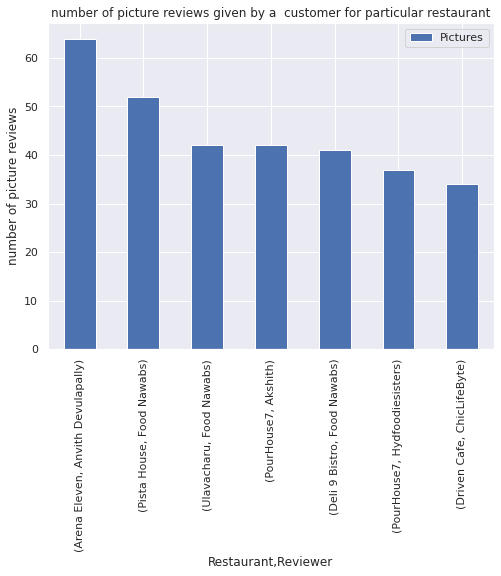

In [272]:
df_rev.groupby(['Restaurant','Reviewer']).aggregate({'Pictures':'sum'}).sort_values('Pictures',ascending=False)[:7].plot(kind='bar')
plt.title('number of picture reviews given by a  customer for particular restaurant')
plt.ylabel('number of picture reviews')

Anvith Devulapally has given highest number picture reviews for Arena Eleven restaurant.

**Lets see which Restaurants had highest ratings in 2 different years for which we had data and the restaurants whose ratings have improved or got worst in from 2018 to 2019-**

In [273]:
year_rating_df_2018=df_rev[df_rev['Year']==2018].groupby(['Restaurant']).aggregate({'Rating':'mean'})

In [274]:
year_rating_df_2019=df_rev[df_rev['Year']==2019].groupby(['Restaurant']).aggregate({'Rating':'mean'})

Highest rated restaurants in 2019-

In [275]:
year_rating_df_2019.sort_values('Rating',ascending=False).head(5)

,Rating
Restaurant,
AB's - Absolute Barbecues,4.88
B-Dubs,4.81
"3B's - Buddies, Bar & Barbecue",4.76
Paradise,4.70
Flechazo,4.66


Highest rated restaurants in 2018-

In [276]:
year_rating_df_2018.sort_values('Rating',ascending=False).head(5)

,Rating
Restaurant,
Feast - Sheraton Hyderabad Hotel,4.629630
Zega - Sheraton Hyderabad Hotel,4.461538
Mazzo - Marriott Executive Apartments,4.375000
Hyderabadi Daawat,4.296296
Cascade - Radisson Hyderabad Hitec City,4.211538


AB's  and B-Dubs  had the highest ratings in 2019 while Feast and Zega had highest ratings in 2018.

In [277]:
rating_comp_df = year_rating_df_2018.merge(year_rating_df_2019, how = 'inner', on = 'Restaurant')


In [278]:
rating_comp_df.head(5)

,Rating_x,Rating_y
Restaurant,,
10 Downing Street,3.757576,3.820896
13 Dhaba,3.573770,3.333333
Al Saba Restaurant,3.246753,2.500000
American Wild Wings,4.000000,3.962264
Amul,4.000000,3.600000


In [279]:
rating_comp_df['diff']=rating_comp_df['Rating_y']-rating_comp_df['Rating_x']

In [280]:
rating_comp_df.sort_values('diff',ascending=False,inplace=True)

In [281]:
rating_comp_df[rating_comp_df['diff']>0]['diff'].head(5)

Restaurant
Delhi-39                    1.400344
Dine O China                1.100508
Karachi Bakery              0.848806
Eat India Company           0.766544
Sardarji's Chaats & More    0.540000
Name: diff, dtype: float64

So,Delhi -39 and Dine O china had the highest improvement in ratings as 1 year has passed.

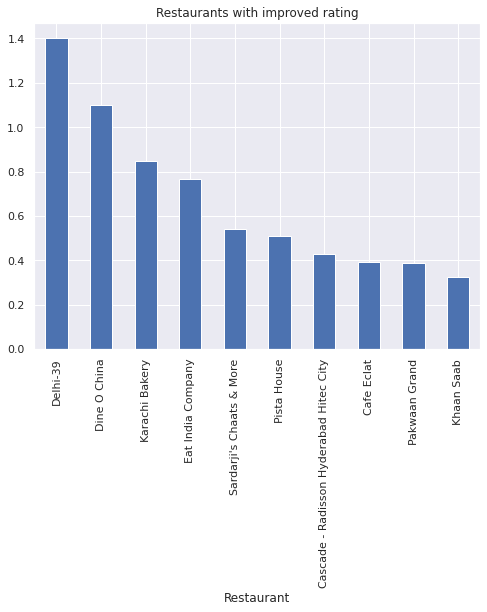

In [282]:
rating_comp_df[rating_comp_df['diff']>0]['diff'].head(10).plot(kind='bar',title='Restaurants with improved rating')

In [283]:
rating_comp_df[rating_comp_df['diff']<0]['diff'].tail(5)

Restaurant
Mohammedia Shawarma         -1.478431
Hitech Bawarchi Food Zone   -1.491228
Triptify                    -1.551491
Owm Nom Nom                 -1.562394
Domino's Pizza              -1.783378
Name: diff, dtype: float64

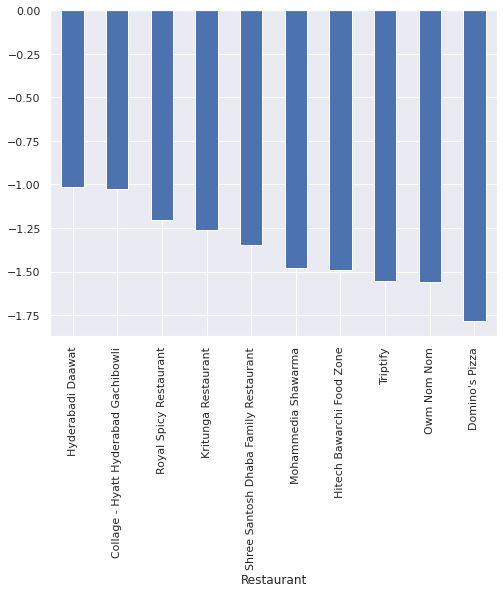

In [284]:
rating_comp_df[rating_comp_df['diff']<0]['diff'].tail(10).plot(kind='bar')

The Domino's Pizza  and and own nom nom are restaurants whose ratings have gone worse in 1 year time.

<Figure size 1440x720 with 0 Axes>

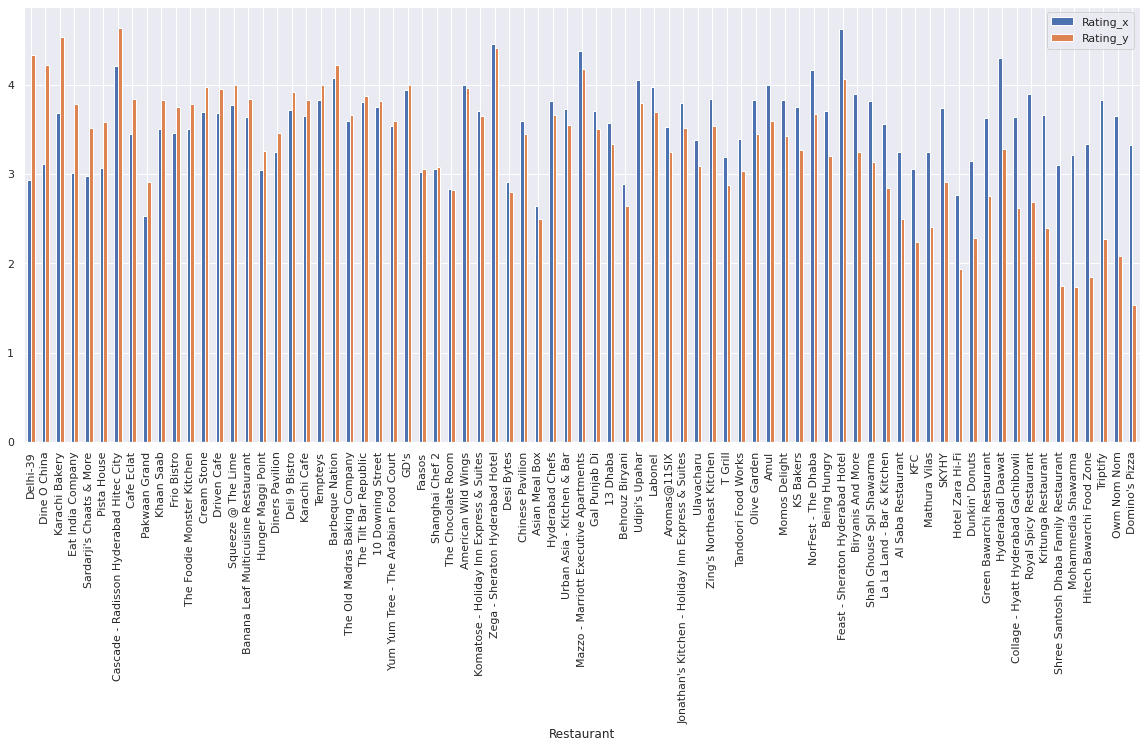

In [285]:
plt.figure(figsize=(20,10))
rating_comp_df[['Rating_x','Rating_y']].plot(kind='bar',figsize=(20,8))

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

We have around 10000 observations in user review dataframe .So we have a lot of observations and the values which are missing are very tough to impute.So we will drop all the null values.

In [286]:
df_rev['Followers'].fillna(0,inplace=True)

In [287]:
df_rev.isna().sum()

Restaurant            1
Reviewer             39
Review               46
Rating                0
Time                 39
Pictures              1
Number of Reviews    39
Followers             0
Year                 39
Month                39
Hour                 39
dtype: int64

In [288]:
df_rev.dropna(inplace=True)

In [289]:
len(df_rev)

9954

In [290]:
df_rev.isna().sum()

Restaurant           0
Reviewer             0
Review               0
Rating               0
Time                 0
Pictures             0
Number of Reviews    0
Followers            0
Year                 0
Month                0
Hour                 0
dtype: int64

### 2. Handling Outliers

**There aren't outliers in numerical continous data.**

In [ ]:
df_name.head(5)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [291]:
def cuisine_list(cuisines):
  
   
   cuisines_list = list(set(cuisines.split(', ')))
   return cuisines_list

In [292]:
df_name['cuisines_list']=df_name['Cuisines'].apply(lambda x:cuisine_list(x))


In [293]:
df_name.head(1)

,Name,Links,Cost,Collections,Cuisines,Timings,cuisines_list
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","[Continental, Chinese, European, Kebab, North ..."


In [294]:
df_name['number of cuisines']=df_name['cuisines_list'].apply( lambda x:len(x))

In [295]:
df_name['Collections_list']=df['Collections_list']=df_name['Collections'].dropna().str.split(', ')

In [296]:
df_name.head(1)

,Name,Links,Cost,Collections,Cuisines,Timings,cuisines_list,number of cuisines,Collections_list
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","[Continental, Chinese, European, Kebab, North ...",6,"[Food Hygiene Rated Restaurants in Hyderabad, ..."


In [297]:
df_name.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'cuisines_list', 'number of cuisines', 'Collections_list'],
      dtype='object')

In [298]:
len(df_name)

105

In [299]:
rating_df.rename(columns={'Restaurant':'Name'},inplace=True)

In [300]:
rating_df['Name']=rating_df.index

In [301]:
rating_df.reset_index(drop=True)

,Rating,Name
0,4.880,AB's - Absolute Barbecues
1,4.810,B-Dubs
2,4.760,"3B's - Buddies, Bar & Barbecue"
3,4.700,Paradise
4,4.660,Flechazo
...,...,...
95,2.825,Behrouz Biryani
96,2.820,Mathura Vilas
97,2.710,Pakwaan Grand
98,2.580,Asian Meal Box


In [302]:
df_name_new=pd.merge(rating_df,df_name,how='inner',left_on='Name',right_on='Name')

In [303]:
df_name_new.head(1)

,Rating,Name,Links,Cost,Collections,Cuisines,Timings,cuisines_list,number of cuisines,Collections_list
0,4.88,AB's - Absolute Barbecues,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM","[European, Mediterranean, North Indian]",3,"[Barbecue & Grill, Great Buffets, Corporate Fa..."


In [304]:
df_name_new=df_name_new.explode('cuisines_list')

In [305]:
df_name_new.reset_index(drop=True,inplace=True)

In [306]:
df_name_new.head(8)

,Rating,Name,Links,Cost,Collections,Cuisines,Timings,cuisines_list,number of cuisines,Collections_list
0,4.88,AB's - Absolute Barbecues,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM",European,3,"[Barbecue & Grill, Great Buffets, Corporate Fa..."
1,4.88,AB's - Absolute Barbecues,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM",Mediterranean,3,"[Barbecue & Grill, Great Buffets, Corporate Fa..."
2,4.88,AB's - Absolute Barbecues,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM",North Indian,3,"[Barbecue & Grill, Great Buffets, Corporate Fa..."
3,4.81,B-Dubs,https://www.zomato.com/hyderabad/b-dubs-gachib...,1600,Hyderabad's Hottest,American,"11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11a...",American,1,[Hyderabad's Hottest]
4,4.76,"3B's - Buddies, Bar & Barbecue",https://www.zomato.com/hyderabad/3bs-buddies-b...,1100,"Barbecue & Grill, Live Sports Screenings","North Indian, Mediterranean, European","12 Noon to 4 PM, 6:30 PM to 11:30 PM",European,3,"[Barbecue & Grill, Live Sports Screenings]"
5,4.76,"3B's - Buddies, Bar & Barbecue",https://www.zomato.com/hyderabad/3bs-buddies-b...,1100,"Barbecue & Grill, Live Sports Screenings","North Indian, Mediterranean, European","12 Noon to 4 PM, 6:30 PM to 11:30 PM",Mediterranean,3,"[Barbecue & Grill, Live Sports Screenings]"
6,4.76,"3B's - Buddies, Bar & Barbecue",https://www.zomato.com/hyderabad/3bs-buddies-b...,1100,"Barbecue & Grill, Live Sports Screenings","North Indian, Mediterranean, European","12 Noon to 4 PM, 6:30 PM to 11:30 PM",North Indian,3,"[Barbecue & Grill, Live Sports Screenings]"
7,4.70,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,Chinese,3,[Hyderabad's Hottest]


In [307]:
df_name_new.shape

(301, 10)

In [308]:
df_name_new.columns

Index(['Rating', 'Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'cuisines_list', 'number of cuisines', 'Collections_list'],
      dtype='object')

In [309]:
set(df_name_new['cuisines_list'])

{'American',
 'Andhra',
 'Arabian',
 'Asian',
 'BBQ',
 'Bakery',
 'Beverages',
 'Biryani',
 'Burger',
 'Cafe',
 'Chinese',
 'Continental',
 'Desserts',
 'European',
 'Fast Food',
 'Finger Food',
 'Goan',
 'Healthy Food',
 'Hyderabadi',
 'Ice Cream',
 'Indonesian',
 'Italian',
 'Japanese',
 'Juices',
 'Kebab',
 'Lebanese',
 'Mediterranean',
 'Mexican',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'North Eastern',
 'North Indian',
 'Pizza',
 'Salad',
 'Seafood',
 'South Indian',
 'Spanish',
 'Street Food',
 'Sushi',
 'Thai',
 'Wraps'}

In [310]:
df_name_new['cuisines_list']

0           European
1      Mediterranean
2       North Indian
3           American
4           European
           ...      
296          Biryani
297     North Indian
298            Asian
299          Chinese
300     North Indian
Name: cuisines_list, Length: 301, dtype: object

In [311]:
lst=[]
for i in df_name_new['cuisines_list']:
  if (i=='Hyderabadi')|(i=='Kebab')|(i=='Biryani')|(i=='Mughlai'):
    lst.append('Mughal food')
  if (i=='Fast Food')|(i=='Street Food')|(i=='Finger Food'):
    lst.append('junk food')
  if (i=='Andhra')|(i=='South Indian')|(i=='North Eastern')|(i=='North Indian')|(i=='Modern Indian')|(i=='Healthy Food')|(i=='Salad'):
    lst.append('Indian')
  if (i=='Thai')|(i=='Asian')|(i=='Chinese')|(i=='Japanese')|(i=='Seafood')|(i=='Sushi')|(i=='Indonesian')|(i=='Momos')|(i=='Goan'):
    lst.append('Southeast Asian')
  if (i=='Arabian')|(i=='Lebanese')|(i=='Mediterranean'):
    lst.append('Middle eastern')
  if (i=='American')|(i=='Pizza')|(i=='Burger')|(i=='Wraps')|(i=='Mexican')|(i=='BBQ'):
    lst.append('American')
  if (i=='European')|(i=='Spanish')|(i=='Continental')|(i=='Italian'):
    lst.append('Continental')
  if (i=='Bakery')|(i=='Beverages')|(i=='Desserts')|(i=='Juices')|(i=='Ice Cream')|(i=='Mithai')|(i=='Cafe'):
    lst.append('Dessert')



In [312]:
cuisines=pd.DataFrame(lst)
cuisines.columns=['cuisine']
cuisines

,cuisine
0,Continental
1,Middle eastern
2,Indian
3,American
4,Continental
...,...
296,Mughal food
297,Indian
298,Southeast Asian
299,Southeast Asian


In [313]:
cuisines.isnull().sum()

cuisine    0
dtype: int64

In [314]:
cuisines.value_counts()

cuisine        
Indian             83
Southeast Asian    73
Continental        40
Dessert            33
Mughal food        31
junk food          17
American           16
Middle eastern      8
dtype: int64

In [315]:
df_cuisine=pd.concat([df_name_new[['Rating','Name','Cost','number of cuisines']],cuisines],axis=1)

In [316]:
df_cuisine.head(5)

,Rating,Name,Cost,number of cuisines,cuisine
0,4.88,AB's - Absolute Barbecues,1500,3,Continental
1,4.88,AB's - Absolute Barbecues,1500,3,Middle eastern
2,4.88,AB's - Absolute Barbecues,1500,3,Indian
3,4.81,B-Dubs,1600,1,American
4,4.76,"3B's - Buddies, Bar & Barbecue",1100,3,Continental


In [317]:
df_cuisine[['Rating','Cost']].corr()

,Rating,Cost
Rating,1.000000,0.374809
Cost,0.374809,1.000000


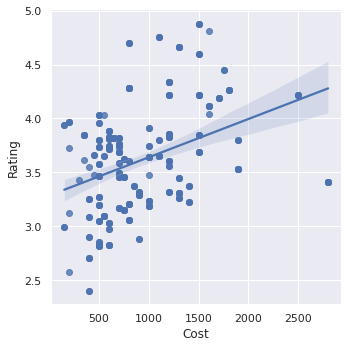

In [318]:
sns.lmplot(x='Cost',y='Rating',data=df_cuisine)

In [319]:
df_cuisine=pd.get_dummies(df_cuisine,columns=["cuisine"],prefix=None)

In [320]:
df_cuisine.head(5)

,Rating,Name,Cost,number of cuisines,cuisine_American,cuisine_Continental,cuisine_Dessert,cuisine_Indian,cuisine_Middle eastern,cuisine_Mughal food,cuisine_Southeast Asian,cuisine_junk food
0,4.88,AB's - Absolute Barbecues,1500,3,0,1,0,0,0,0,0,0
1,4.88,AB's - Absolute Barbecues,1500,3,0,0,0,0,1,0,0,0
2,4.88,AB's - Absolute Barbecues,1500,3,0,0,0,1,0,0,0,0
3,4.81,B-Dubs,1600,1,1,0,0,0,0,0,0,0
4,4.76,"3B's - Buddies, Bar & Barbecue",1100,3,0,1,0,0,0,0,0,0


In [321]:
cuisine=list(set(df_cuisine.columns)-set(['Name','Cost','number of cuisines','Rating']))


In [322]:
df_cluster=df_cuisine.groupby(['Rating','Name','Cost','number of cuisines'])[cuisine].sum().reset_index()


In [323]:
cuisine+['Rating','Cost']

['cuisine_Dessert',
 'cuisine_American',
 'cuisine_junk food',
 'cuisine_Middle eastern',
 'cuisine_Indian',
 'cuisine_Continental',
 'cuisine_Southeast Asian',
 'cuisine_Mughal food',
 'Rating',
 'Cost']

In [324]:
df_final=df_cluster[['Rating','Cost']+cuisine]

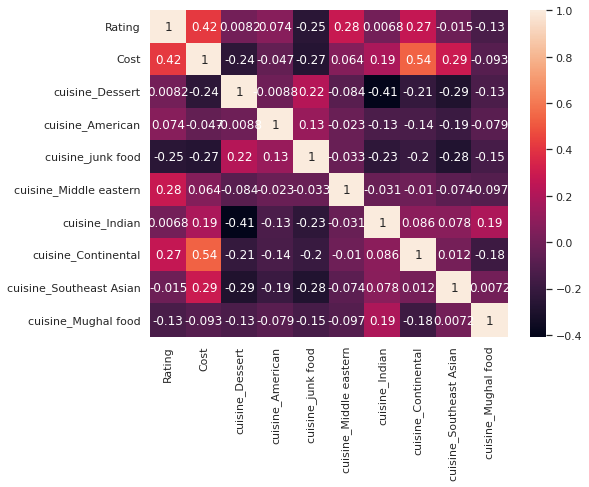

In [325]:
sns.heatmap(df_final.corr(),annot=True)

In [326]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rating                   100 non-null    float64
 1   Cost                     100 non-null    int64  
 2   cuisine_Dessert          100 non-null    uint8  
 3   cuisine_American         100 non-null    uint8  
 4   cuisine_junk food        100 non-null    uint8  
 5   cuisine_Middle eastern   100 non-null    uint8  
 6   cuisine_Indian           100 non-null    uint8  
 7   cuisine_Continental      100 non-null    uint8  
 8   cuisine_Southeast Asian  100 non-null    uint8  
 9   cuisine_Mughal food      100 non-null    uint8  
dtypes: float64(1), int64(1), uint8(8)
memory usage: 2.5 KB


In [327]:
df_final.head(5)

,Rating,Cost,cuisine_Dessert,cuisine_American,cuisine_junk food,cuisine_Middle eastern,cuisine_Indian,cuisine_Continental,cuisine_Southeast Asian,cuisine_Mughal food
0,2.400,400,0,0,0,0,1,0,1,0
1,2.580,200,0,0,0,0,0,0,1,0
2,2.710,400,0,0,0,0,1,0,1,1
3,2.820,500,0,0,0,0,2,0,1,0
4,2.825,600,0,0,0,0,0,0,0,2


In [328]:
x=list(set(list(df_final.columns))-{'Rating','Cost'})

In [329]:
x

['cuisine_Dessert',
 'cuisine_American',
 'cuisine_junk food',
 'cuisine_Middle eastern',
 'cuisine_Indian',
 'cuisine_Continental',
 'cuisine_Southeast Asian',
 'cuisine_Mughal food']

In [330]:
ms=MinMaxScaler()
df_final_scaled=ms.fit_transform(df_final[['Rating','Cost']])
df_final_scaled

array([[0.        , 0.09433962],
       [0.07258065, 0.01886792],
       [0.125     , 0.09433962],
       [0.16935484, 0.13207547],
       [0.17137097, 0.16981132],
       [0.1733871 , 0.13207547],
       [0.1733871 , 0.16981132],
       [0.18145161, 0.13207547],
       [0.19354839, 0.28301887],
       [0.2016129 , 0.09433962],
       [0.23185484, 0.16981132],
       [0.23790323, 0.        ],
       [0.25403226, 0.16981132],
       [0.26209677, 0.13207547],
       [0.26612903, 0.24528302],
       [0.27822581, 0.09433962],
       [0.28024194, 0.1509434 ],
       [0.29032258, 0.01886792],
       [0.30443548, 0.22641509],
       [0.31048387, 0.20754717],
       [0.31854839, 0.32075472],
       [0.32258065, 0.13207547],
       [0.3266129 , 0.24528302],
       [0.33266129, 0.47169811],
       [0.33467742, 0.32075472],
       [0.34274194, 0.09433962],
       [0.34677419, 0.43396226],
       [0.35080645, 0.13207547],
       [0.35887097, 0.28301887],
       [0.36693548, 0.43396226],
       [0.

In [331]:
list(df_final_scaled[:,0])

[0.0,
 0.07258064516129048,
 0.125,
 0.1693548387096775,
 0.17137096774193572,
 0.17338709677419373,
 0.17338709677419373,
 0.18145161290322598,
 0.19354838709677424,
 0.2016129032258065,
 0.2318548387096775,
 0.23790322580645173,
 0.254032258064516,
 0.2620967741935485,
 0.2661290322580645,
 0.278225806451613,
 0.2802419354838712,
 0.2903225806451615,
 0.30443548387096775,
 0.310483870967742,
 0.31854838709677424,
 0.3225806451612905,
 0.3266129032258065,
 0.33266129032258074,
 0.33467741935483875,
 0.342741935483871,
 0.346774193548387,
 0.35080645161290325,
 0.3588709677419355,
 0.36693548387096775,
 0.370967741935484,
 0.370967741935484,
 0.3911290322580647,
 0.3911290322580647,
 0.4072580645161292,
 0.4153225806451615,
 0.4233870967741937,
 0.42741935483870974,
 0.42741935483870974,
 0.431451612903226,
 0.435483870967742,
 0.435483870967742,
 0.43951612903225823,
 0.45766129032258074,
 0.46370967741935476,
 0.467741935483871,
 0.47580645161290325,
 0.4798387096774195,
 0.487903225

In [332]:
df_scaled=pd.concat([pd.DataFrame({'Rating':list(df_final_scaled[:,0]),'Cost':list(df_final_scaled[:,1])}),df_final[x]],axis=1)

In [333]:
df_scaled.values

array([[0.        , 0.09433962, 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ],
       [0.07258065, 0.01886792, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.125     , 0.09433962, 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 1.        ],
       [0.16935484, 0.13207547, 0.        , 0.        , 0.        ,
        0.        , 2.        , 0.        , 1.        , 0.        ],
       [0.17137097, 0.16981132, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 2.        ],
       [0.1733871 , 0.13207547, 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ],
       [0.1733871 , 0.16981132, 2.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.18145161, 0.13207547, 0.       

In [334]:
df_scaled.shape

(100, 10)

In [335]:
from sklearn import metrics

k_range = range(2, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(df_scaled.values)
    scores.append(metrics.silhouette_score(df_scaled.values, km.labels_))

In [336]:
scores

[0.23242429563391276,
 0.2646042733692415,
 0.26619159960419225,
 0.26974206985924776,
 0.2633387652126955,
 0.257690319306678,
 0.26581231988528325,
 0.2632573780598918,
 0.2702191607900697,
 0.2683781260583457]

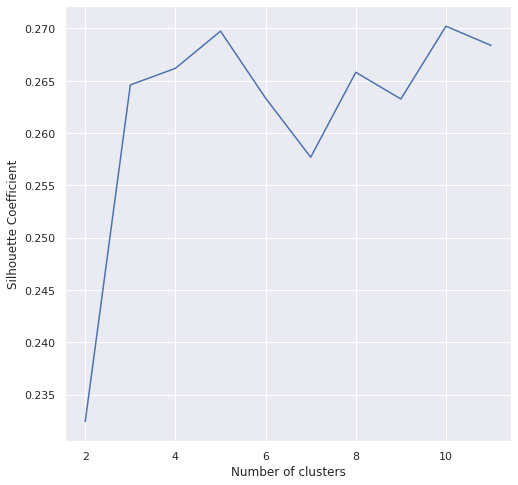

In [337]:
# plot the results
plt.figure(figsize=(8,8))
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [338]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit_transform(df_scaled)
    cluster_errors.append( clusters.inertia_ )
    
cluster_errors

[329.96943336968206,
 258.88675929690504,
 216.52303848734147,
 172.96829295564623,
 148.283239046861,
 130.5954709735306,
 117.37196241782212,
 109.89548442021598,
 99.70909534413138,
 95.24808975322065,
 89.85926936723536,
 87.82646780374772,
 82.41345393391059,
 78.79420911493872]

In [339]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:9]

,num_clusters,cluster_errors
0,1,329.969433
1,2,258.886759
2,3,216.523038
3,4,172.968293
4,5,148.283239
5,6,130.595471
6,7,117.371962
7,8,109.895484
8,9,99.709095


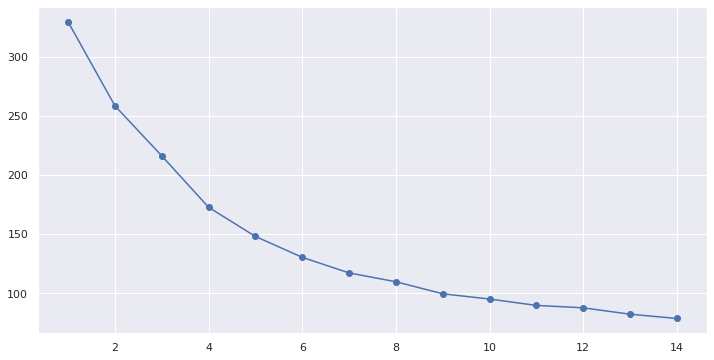

In [340]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [341]:
X=df_scaled.values

In [342]:
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.20125782216485086
For n_clusters = 3 The average silhouette_score is : 0.2646042733692415
For n_clusters = 4 The average silhouette_score is : 0.2635609726206499
For n_clusters = 5 The average silhouette_score is : 0.269158366711483
For n_clusters = 6 The average silhouette_score is : 0.27016263535678864
For n_clusters = 7 The average silhouette_score is : 0.2774350741208629
For n_clusters = 8 The average silhouette_score is : 0.28128868365122217
For n_clusters = 9 The average silhouette_score is : 0.2565277877637043
For n_clusters = 10 The average silhouette_score is : 0.2688632481725358
For n_clusters = 11 The average silhouette_score is : 0.2713869111251754


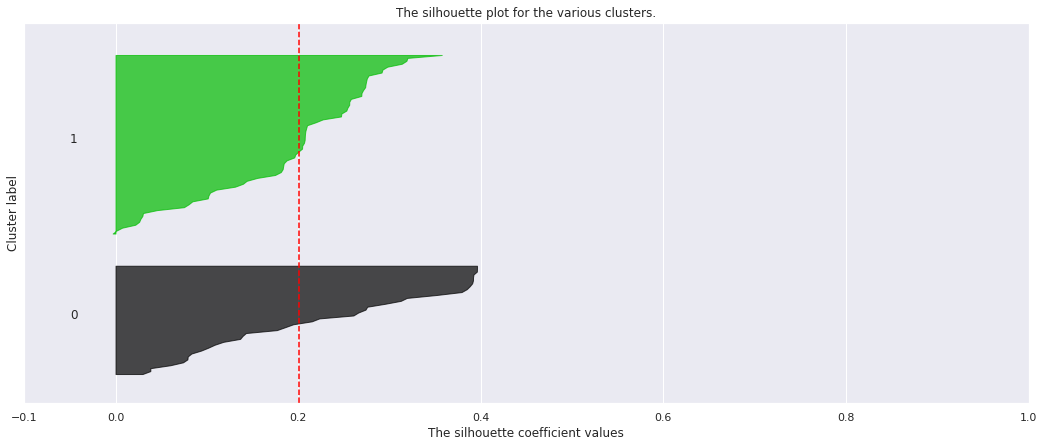

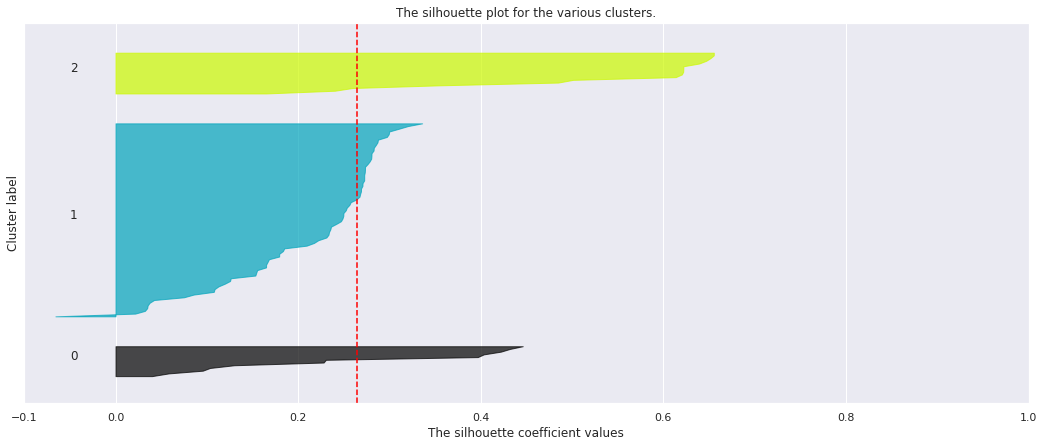

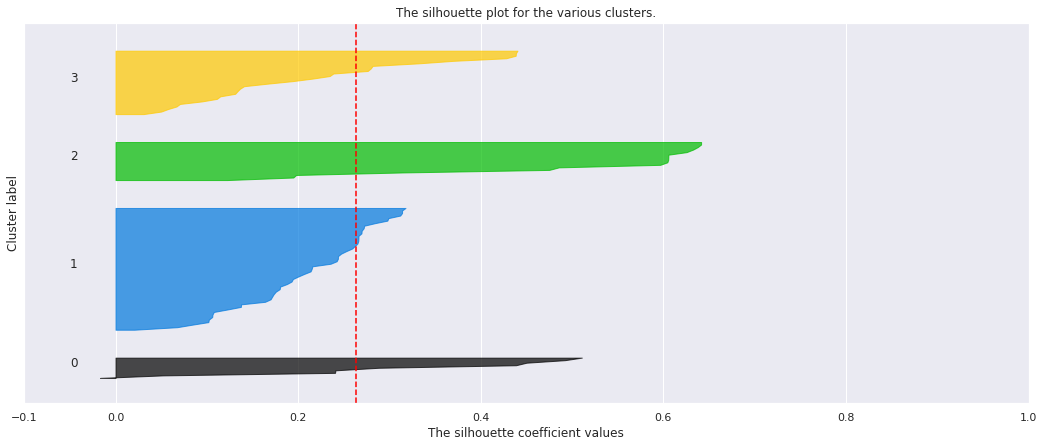

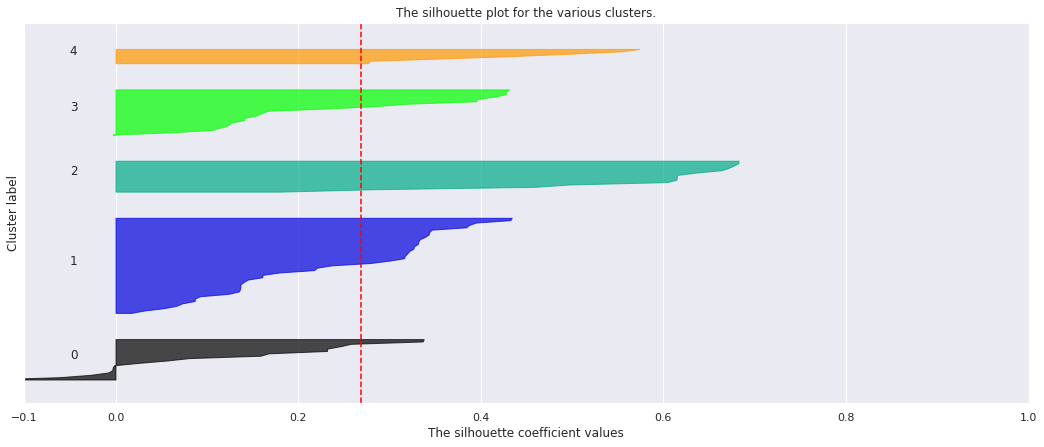

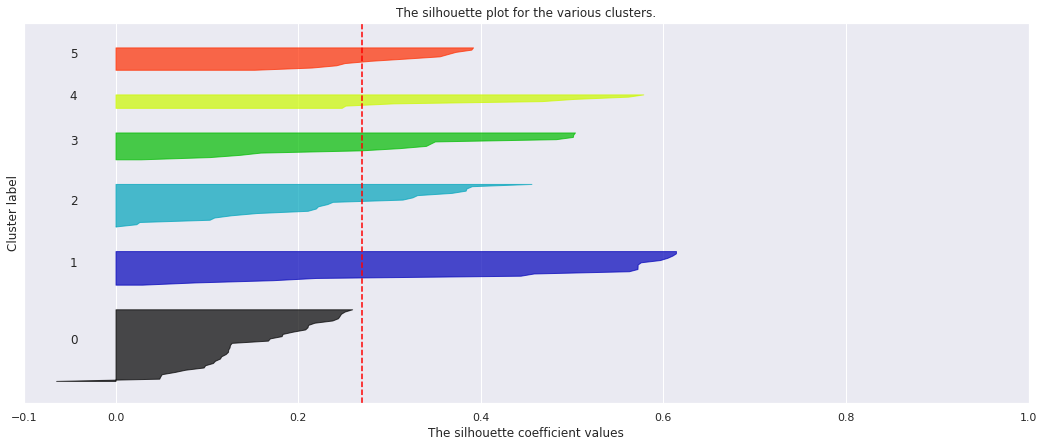

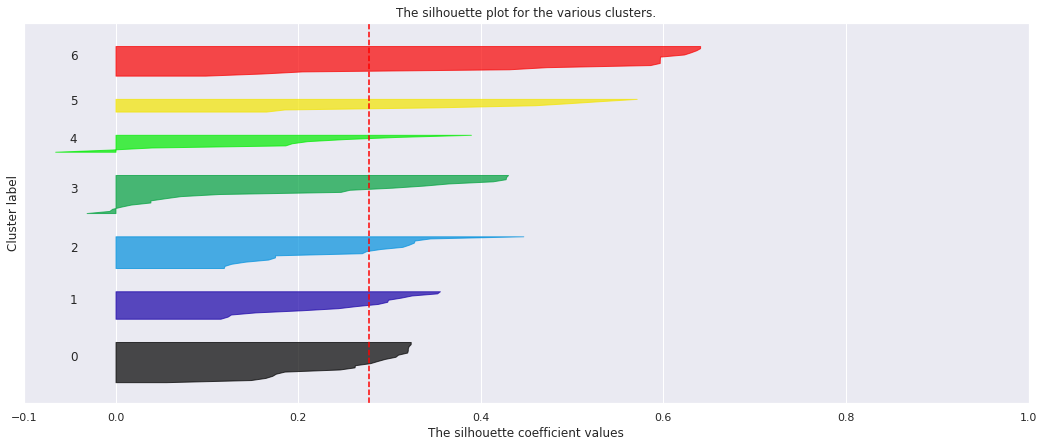

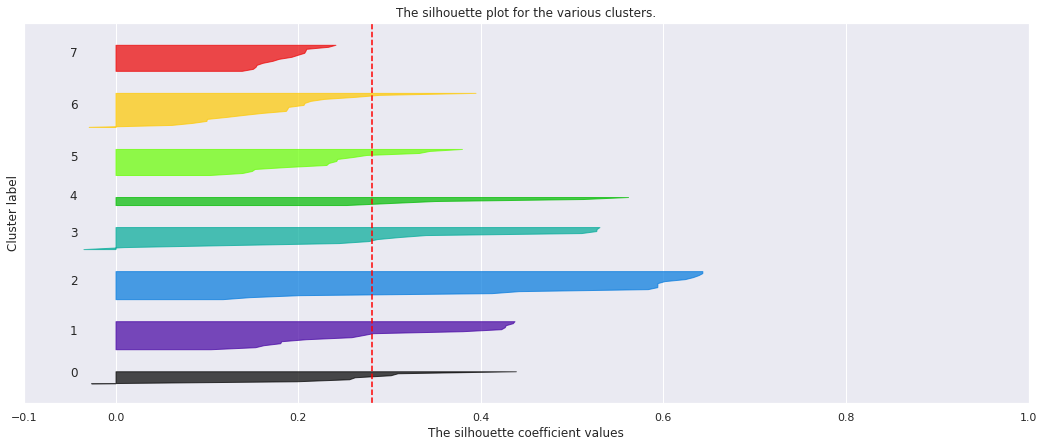

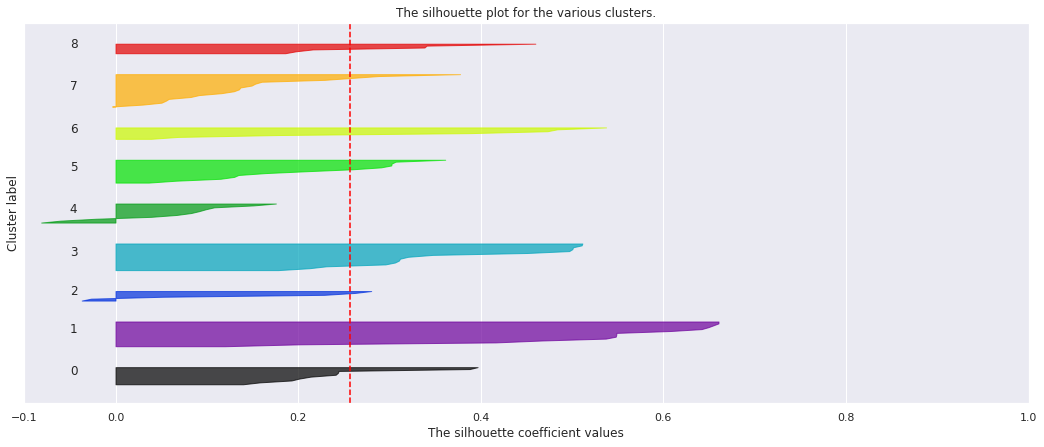

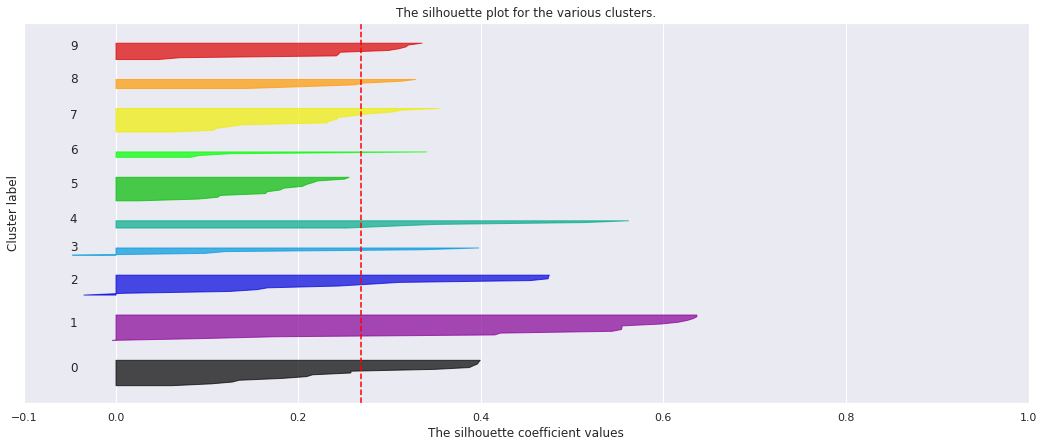

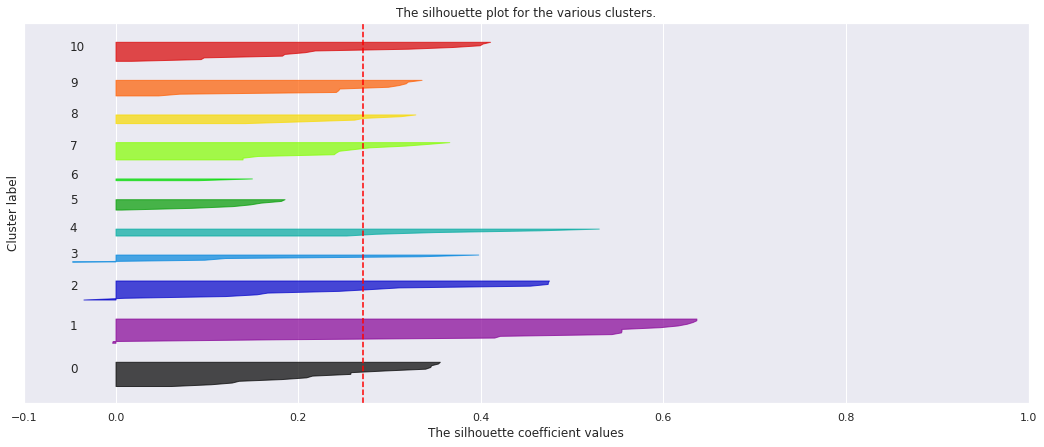

In [343]:
range_n_clusters = list(range(2,12))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   

plt.show()

In [344]:
km = KMeans(n_clusters=5, n_init=1000, max_iter=650, random_state=1)
predicted_clusters = km.fit_predict(df_scaled)
predicted_clusters

array([3, 2, 3, 3, 3, 3, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 1, 2, 3, 3, 3, 4,
       3, 3, 1, 2, 3, 3, 3, 4, 4, 3, 0, 4, 4, 2, 2, 3, 3, 3, 2, 2, 3, 4,
       2, 3, 2, 1, 4, 4, 1, 2, 3, 0, 3, 3, 3, 0, 1, 2, 3, 3, 0, 1, 3, 4,
       1, 3, 3, 4, 1, 3, 4, 1, 4, 1, 4, 2, 1, 1, 2, 1, 2, 3, 2, 3, 4, 4,
       4, 0, 4, 4, 4, 0, 3, 3, 3, 4, 2, 4], dtype=int32)

In [345]:
np.unique(km.labels_,return_counts=True,return_index=True)

(array([0, 1, 2, 3, 4], dtype=int32),
 array([14,  6,  1,  0, 21]),
 array([ 7, 15, 20, 37, 21]))

In [346]:
km = KMeans(n_clusters=4, n_init=1000, max_iter=650, random_state=1)
predicted_clusters = km.fit_predict(df_scaled)
predicted_clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 3,
       1, 1, 0, 1, 1, 1, 1, 3, 3, 1, 2, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 0, 0, 3, 3, 0, 3, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 3, 3,
       0, 1, 1, 3, 0, 1, 3, 0, 3, 0, 3, 1, 0, 0, 1, 0, 1, 1, 3, 1, 3, 3,
       3, 2, 3, 3, 3, 2, 1, 1, 1, 3, 1, 3], dtype=int32)

In [347]:
np.unique(km.labels_,return_counts=True,return_index=True)

(array([0, 1, 2, 3], dtype=int32),
 array([ 6,  0, 14, 21]),
 array([16, 51,  7, 26]))

In [348]:
km = KMeans(n_clusters=8, n_init=1000, max_iter=650, random_state=1)
predicted_clusters = km.fit_predict(df_scaled)
predicted_clusters

array([3, 3, 1, 5, 1, 3, 6, 7, 0, 3, 3, 0, 6, 1, 4, 7, 6, 0, 1, 5, 1, 5,
       3, 5, 6, 0, 1, 1, 5, 5, 2, 5, 4, 3, 2, 0, 0, 1, 3, 1, 0, 0, 1, 5,
       0, 1, 7, 6, 2, 0, 6, 3, 5, 4, 3, 3, 5, 4, 6, 3, 1, 5, 3, 6, 1, 3,
       6, 1, 3, 5, 6, 1, 2, 6, 2, 6, 2, 7, 6, 6, 7, 6, 0, 5, 0, 1, 5, 2,
       2, 4, 2, 2, 3, 3, 3, 3, 1, 0, 7, 0], dtype=int32)

In [349]:
np.unique(km.labels_,return_counts=True,return_index=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([ 8,  2, 30,  0, 14,  3,  6,  7]),
 array([14, 17, 10, 19,  5, 14, 15,  6]))

In [350]:
df_cluster['clusters']=predicted_clusters

In [351]:
df_cluster['clusters'].value_counts()

3    19
1    17
6    15
5    14
0    14
2    10
7     6
4     5
Name: clusters, dtype: int64

In [352]:
df_final.head(5)

,Rating,Cost,cuisine_Dessert,cuisine_American,cuisine_junk food,cuisine_Middle eastern,cuisine_Indian,cuisine_Continental,cuisine_Southeast Asian,cuisine_Mughal food
0,2.400,400,0,0,0,0,1,0,1,0
1,2.580,200,0,0,0,0,0,0,1,0
2,2.710,400,0,0,0,0,1,0,1,1
3,2.820,500,0,0,0,0,2,0,1,0
4,2.825,600,0,0,0,0,0,0,0,2


In [353]:
df_cluster.head(5)

,Rating,Name,Cost,number of cuisines,cuisine_Dessert,cuisine_American,cuisine_junk food,cuisine_Middle eastern,cuisine_Indian,cuisine_Continental,cuisine_Southeast Asian,cuisine_Mughal food,clusters
0,2.400,Hotel Zara Hi-Fi,400,2,0,0,0,0,1,0,1,0,3
1,2.580,Asian Meal Box,200,1,0,0,0,0,0,0,1,0,3
2,2.710,Pakwaan Grand,400,3,0,0,0,0,1,0,1,1,1
3,2.820,Mathura Vilas,500,3,0,0,0,0,2,0,1,0,5
4,2.825,Behrouz Biryani,600,2,0,0,0,0,0,0,0,2,1


In [354]:
df_cluster['clusters'].value_counts()

3    19
1    17
6    15
5    14
0    14
2    10
7     6
4     5
Name: clusters, dtype: int64

In [355]:
df_name_new.head(10)

,Rating,Name,Links,Cost,Collections,Cuisines,Timings,cuisines_list,number of cuisines,Collections_list
0,4.88,AB's - Absolute Barbecues,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM",European,3,"[Barbecue & Grill, Great Buffets, Corporate Fa..."
1,4.88,AB's - Absolute Barbecues,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM",Mediterranean,3,"[Barbecue & Grill, Great Buffets, Corporate Fa..."
2,4.88,AB's - Absolute Barbecues,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM",North Indian,3,"[Barbecue & Grill, Great Buffets, Corporate Fa..."
3,4.81,B-Dubs,https://www.zomato.com/hyderabad/b-dubs-gachib...,1600,Hyderabad's Hottest,American,"11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11a...",American,1,[Hyderabad's Hottest]
4,4.76,"3B's - Buddies, Bar & Barbecue",https://www.zomato.com/hyderabad/3bs-buddies-b...,1100,"Barbecue & Grill, Live Sports Screenings","North Indian, Mediterranean, European","12 Noon to 4 PM, 6:30 PM to 11:30 PM",European,3,"[Barbecue & Grill, Live Sports Screenings]"
5,4.76,"3B's - Buddies, Bar & Barbecue",https://www.zomato.com/hyderabad/3bs-buddies-b...,1100,"Barbecue & Grill, Live Sports Screenings","North Indian, Mediterranean, European","12 Noon to 4 PM, 6:30 PM to 11:30 PM",Mediterranean,3,"[Barbecue & Grill, Live Sports Screenings]"
6,4.76,"3B's - Buddies, Bar & Barbecue",https://www.zomato.com/hyderabad/3bs-buddies-b...,1100,"Barbecue & Grill, Live Sports Screenings","North Indian, Mediterranean, European","12 Noon to 4 PM, 6:30 PM to 11:30 PM",North Indian,3,"[Barbecue & Grill, Live Sports Screenings]"
7,4.70,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,Chinese,3,[Hyderabad's Hottest]
8,4.70,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,Biryani,3,[Hyderabad's Hottest]
9,4.70,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,North Indian,3,[Hyderabad's Hottest]


In [356]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 15

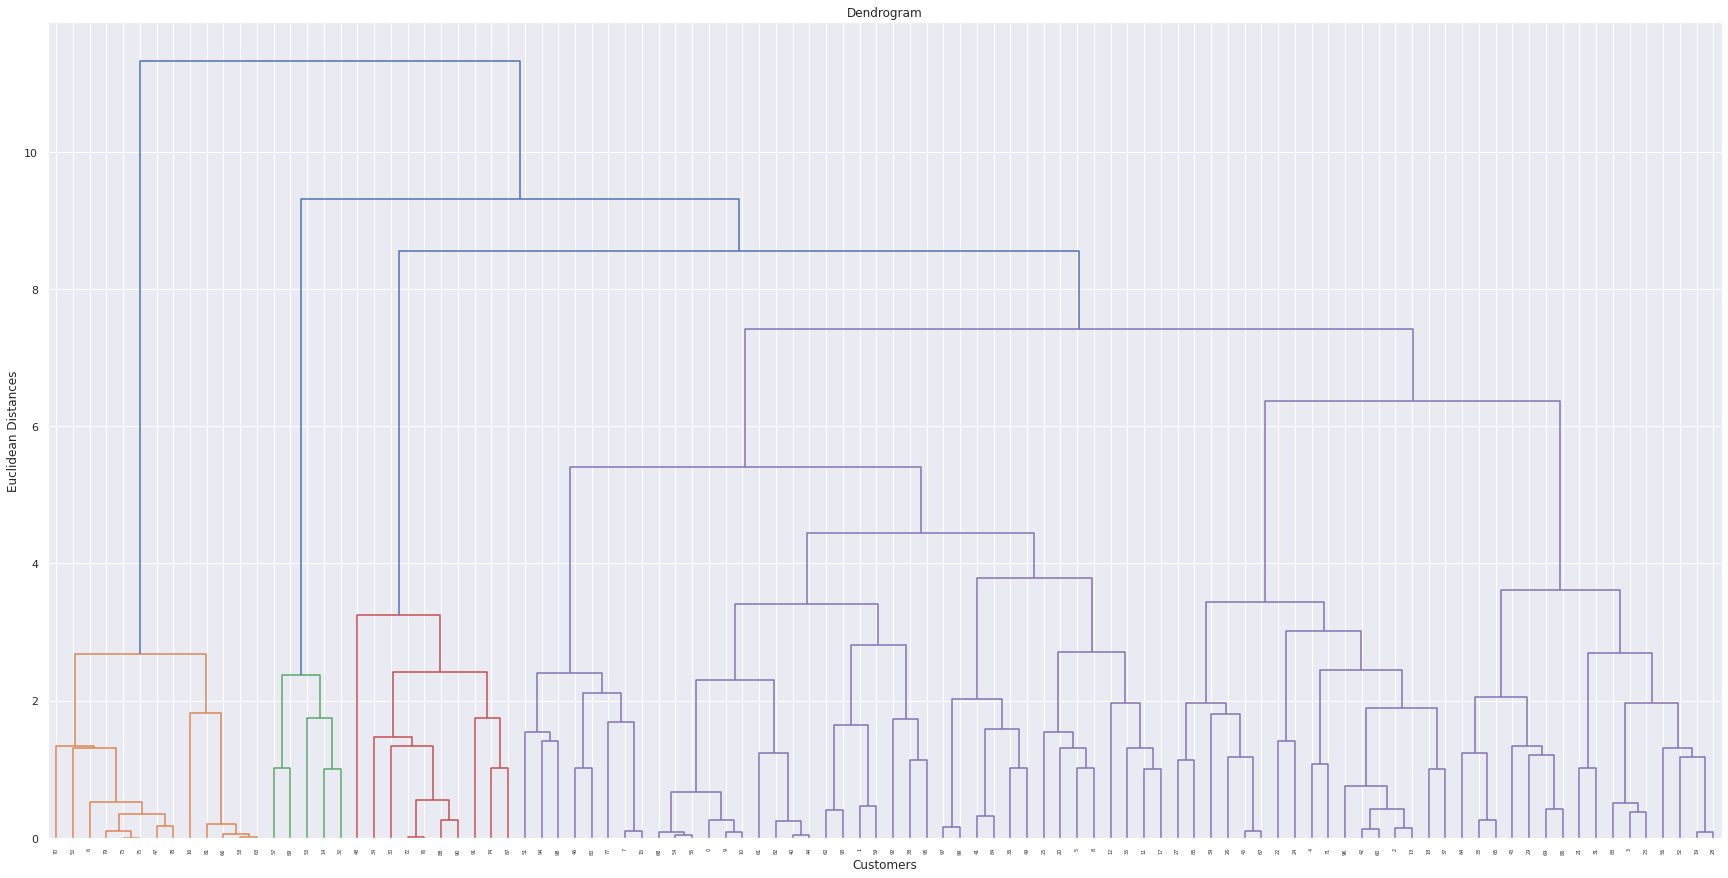

In [357]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

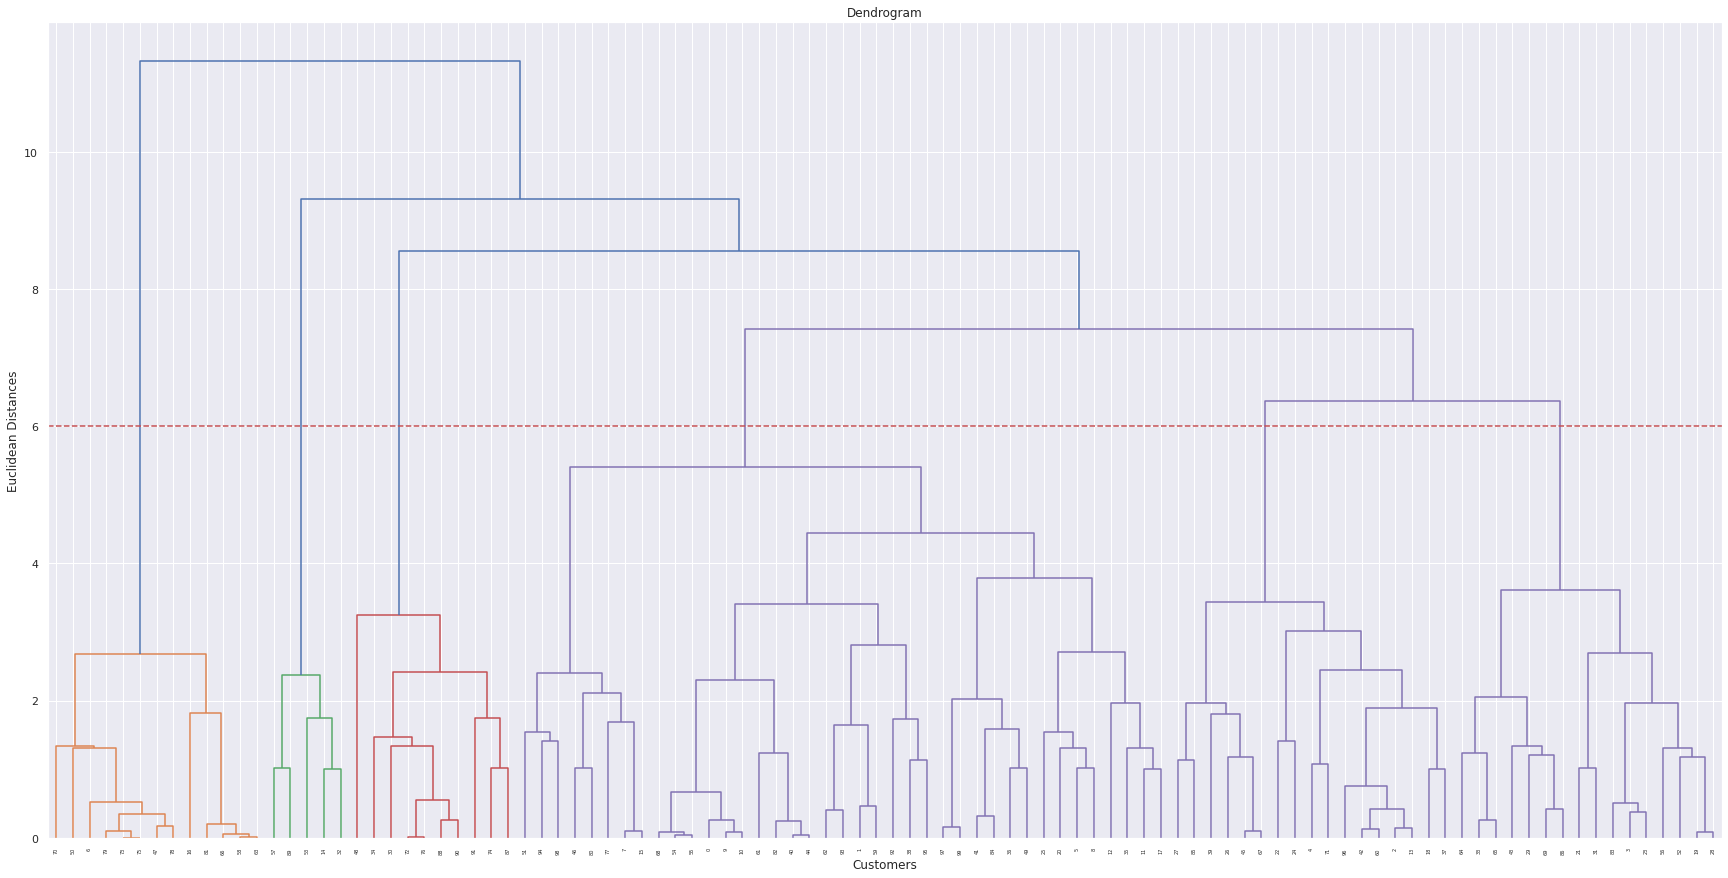

In [358]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=6, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line


In [359]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage = 'ward')
predicted_hc = hc.fit_predict(df_scaled)

In [360]:
predicted_hc

array([3, 3, 2, 1, 2, 0, 7, 6, 0, 3, 3, 0, 0, 2, 5, 6, 7, 0, 2, 1, 0, 1,
       2, 1, 2, 0, 2, 2, 1, 1, 4, 1, 5, 1, 4, 0, 0, 2, 3, 2, 3, 0, 2, 1,
       3, 2, 6, 7, 4, 0, 7, 6, 1, 5, 3, 3, 1, 5, 7, 3, 2, 3, 3, 7, 1, 1,
       7, 2, 3, 1, 7, 2, 4, 7, 4, 7, 4, 6, 7, 7, 6, 7, 3, 1, 0, 2, 1, 4,
       4, 5, 4, 4, 3, 3, 6, 3, 2, 0, 6, 0])

In [361]:
np.unique(predicted_hc,return_counts=True,return_index=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 5,  3,  2,  0, 30, 14,  7,  6]),
 array([14, 16, 17, 17, 10,  5,  8, 13]))

In [362]:
df_cluster['clusters_hc']=predicted_hc

In [363]:
df_cluster[['clusters','clusters_hc']]

,clusters,clusters_hc
0,3,3
1,3,3
2,1,2
3,5,1
4,1,2
...,...,...
95,3,3
96,1,2
97,0,0
98,7,6


Text(0, 0.5, 'Rating')

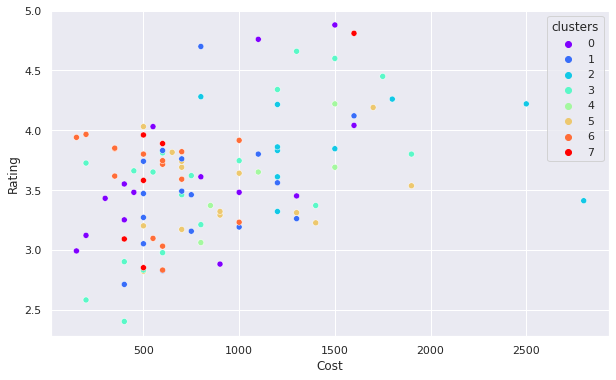

In [364]:
# Plot the clusters

plt.figure(figsize=[10, 6])
sns.scatterplot(x = df_cluster['Cost'], y = df_cluster['Rating'], hue = df_cluster['clusters'], palette='rainbow', legend = 'full')
plt.xlabel('Cost')
plt.ylabel('Rating')

### 4. Textual Data Preprocessing 


## **4.1 Removing Punctuations**

In [366]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [367]:
stop_words = stopwords.words('english')


In [368]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [369]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [370]:
df_rev.head(1)

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Number of Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0


In [371]:
df_rev['Review']=df_rev['Review'].apply(remove_punctuation)

In [375]:
df_rev.loc[0,'Review'].split()

['ambience',
 'good',
 'food',
 'quite',
 'good',
 'saturday',
 'lunch',
 'cost',
 'effective',
 'good',
 'place',
 'sate',
 'brunch',
 'one',
 'also',
 'chill',
 'friends',
 'parents',
 'waiter',
 'soumen',
 'das',
 'really',
 'courteous',
 'helpful']

In [376]:
df_rev.loc[0,'Review']

'ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful'

## **4.2 Removing Stopwords**

In [372]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [373]:
df_rev['Review']=df_rev['Review'].apply(stopwords)

In [374]:
df_rev['Review'].head(10)

0    ambience good food quite good saturday lunch c...
1    ambience good pleasant evening service prompt ...
2    must try great food great ambience thnx servic...
3    soumen das arun great guy behavior sincerety g...
4    food goodwe ordered kodi drumsticks basket mut...
5    ambiance good service good food apradeecp subr...
6    nice place ambience different food ordered tas...
7    well reading many reviews finally visited plac...
8    excellent food specially like spicy food court...
9    came birthday treat close friend perfect place...
Name: Review, dtype: object

## **4.3 Lemmatization**

In [377]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [404]:
x=df_rev.loc[2,'Review']
doc = nlp(x)  
l=list()
for word in doc:
  l.append(word.lemma_)
  text=' '.join(l)


In [403]:
print(type(doc))

<class 'spacy.tokens.doc.Doc'>


In [407]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [413]:
from nltk import word_tokenize


In [408]:
wnl = WordNetLemmatizer()

In [405]:
x

'must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing'

In [406]:
text

'must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing'

In [426]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [431]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [427]:
# Function for lemmatization
def lemmatization_(text):
  
    list2 = nltk.word_tokenize(text)
  
    
    x= ' '.join([wnl.lemmatize(words) for words in list2])
    return x

In [428]:
review=df_rev['Review']

In [429]:
len(review)

9954

In [432]:
# Applying lematization
df_rev['Review']=df_rev['Review'].apply(lemmatization_)

In [433]:
df_rev.loc[2,'Review']

'must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing'

In [383]:
# Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_numericals(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

In [384]:
review=remove_numericals(review)

In [387]:
len(review)

10000

In [388]:
len(df_rev['Review'])

9954

In [386]:
df_rev['Review']=review
df_rev.head()

ValueError: ignored

In [ ]:
df_rev['sentiments'] = df_rev['Rating'].apply(lambda Rating : 1 if Rating > 3.5 else (0 if 2 <= Rating <= 3.5 else -1))


In [ ]:
df_rev['sentiments'].value_counts()

 1    6268
 0    1942
-1    1744
Name: sentiments, dtype: int64

In [ ]:
sentiments = {1:[4,5,'Positive '],0:[3,3.5,'Neutral '],-1:[1,2.5,'Negative ']}


In [ ]:
sentiment=1

In [ ]:
df1 = df_rev[(df_rev['Rating']>=sentiments[sentiment][0]) & (df_rev['Rating']<=sentiments[sentiment][1])]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [ ]:
cv = CountVectorizer(ngram_range= (3,3))
total_words = cv.fit_transform(df1['Review'])

In [ ]:
count = total_words.sum(axis = 0)


In [ ]:
count.shape

(1, 148961)

In [ ]:
freq_df = pd.DataFrame((word, count[0, idx]) for word, idx in cv.vocabulary_.items())


In [ ]:
freq_df.columns=[sentiments[sentiment][2]+'Words','Frequency']
freq_df

,Positive Words,Frequency
0,ambience good food,27
1,good food quite,1
2,food quite good,5
3,quite good saturday,1
4,good saturday lunch,1
...,...,...
148956,celebrations perfect crowd,1
148957,perfect crowd got,1
148958,crowd got attention,1
148959,got attention service,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def most_frequent_words(sentiment,n):

    #positive sentiment if ratings >= 4
    #negative sentiment if ratings < 2
    #neutral sentiment if 3 < ratings < 4
    if sentiment is 'Positive':
      x1=4
      x2=5
    elif sentiment is 'Neutral':
      x1=3
      x2=3.5
    elif sentiment is 'Negative':
      x1=1
      x2=2.5


    df1 = df_rev[(df_rev['Rating']>=x1) & (df_rev['Rating']<=x2)]

    #converts words into vectors based on count
    cv = CountVectorizer(ngram_range= (n,n))
    total_words = cv.fit_transform(df1['Review'])
    
    #Will count the total number if occurances of each word in all reviews
    count = total_words.sum(axis = 0)
    
    #storing and sorting them in a list of tuples
    freq_df = pd.DataFrame((word, count[0, idx]) for word, idx in cv.vocabulary_.items())
    freq_df.columns=[sentiment+' '+'Words','Frequency']
    freq_df = freq_df.sort_values(by='Frequency',ascending=False)
    
    return freq_df.reset_index().drop('index',axis=1)

In [ ]:
positive_df = most_frequent_words('Positive',4)
neutral_df = most_frequent_words('Neutral',4)
negative_df = most_frequent_words('Negative',4)

In [ ]:
neg_pos = pd.concat([negative_df['Negative Words'][:20], positive_df['Positive Words'][:20]],axis=1)
total = pd.concat([neg_pos, neutral_df['Neutral Words'][:20]],axis=1)
total

,Negative Words,Positive Words,Neutral Words
0,please dont order food,good place hangout friends,raju gari kodi pulao
1,100 times better biryani,nice place hangout friends,want asif want asif
2,please dont waste money,excellent food excellent service,yum yum tree one
3,double egg double chicken,good food good service,food 35 service 45
4,starters good main course,would love visit place,cheesy melt paneer wrap
5,quantity sucks service quantity,nice place good food,good taste main course
6,sucks service quantity sucks,would definitely recommend place,paneer tikka masala roll
7,service quantity sucks service,good north indian food,asif want asif want
8,biryani taste good biryani,good place hang friends,options veg non veg
9,ordered special chicken shawarma,nice place paradise gachibowli,service good staff courteous


In [ ]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

def stemming(text):    
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

#applying stemmer
df_rev['Review'] = df_rev['Review'].apply(stemming)

In [ ]:
# Applying train test split

X = df_rev['Review']
y = df_rev['sentiments']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [ ]:
y_train.value_counts()

 1    5014
 0    1554
-1    1395
Name: sentiments, dtype: int64

In [ ]:
y_test.value_counts()

 1    1254
 0     388
-1     349
Name: sentiments, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
train_array= X_train_vec.toarray()
test_array = X_test_vec.toarray()

In [ ]:
tfidf_df=pd.DataFrame(train_array,columns=vectorizer.get_feature_names())
tfidf_df

,015,03feb2019,04,05,055,05th,0635,0kms,10,100,...,zomtato,zone,zoneincreas,zonequ,zoomato,zucchini,zyada,àlacart,ànd,éclat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(class_weight='balanced',random_state=0)
model.fit(X_train_vec,y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [ ]:
lr_score = model.score(X_test_vec, y_test)
print("Results for Logistic Regression")
print(lr_score)

Results for Logistic Regression
0.7759919638372677
